# Data Olympians CS Streaming Presentation Notebook

## Oliver's Notebook Workings


## 1. Setup

### 1.1 Import Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy import stats

### 1.2 Load the Dataset

In [ ]:
# Load the dataset
df = pd.read_csv('data/netflix_titles.csv')

# Display the first few rows of the dataset
df.head()

## 2. Data Preparation

### 2.1 Missing Values

In [ ]:
# Check for missing values
print(df.isnull().sum())

In [ ]:
# Handle missing values
# For simplicity, let's fill missing values for `director` and `cast` with 'Unknown'
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)

In [ ]:
# Fill missing values in `country` with 'Unknown'
df['country'].fillna('Unknown', inplace=True)

In [ ]:
# For `date_added`, let's fill missing values with a placeholder or drop them if they are not critical
df['date_added'].fillna('Unknown', inplace=True)

In [ ]:
# Format duration column, in order to carry out Calculation
def extract_number(duration):
    if isinstance(duration, str):
        return int(duration.split(' ')[0])
    else:
        return None

# Apply function to 'duration' column to create a new 'number' column
df['number'] = df['duration'].apply(extract_number)


In [ ]:
# Now fill nulls in number column and duration column 
# Calculate mean for each type
mean_seasons = df[df['type'] == 'TV Show']['number'].mean()
mean_minutes = df[df['type'] == 'Movie']['number'].mean()

In [ ]:
# Function goes through row by row, if its null and in number column, depending on type it fills with mean seasons or minutes
def fill_missing(row):
    if pd.isna(row['number']):
        if row['type'] == 'TV Show':
            return mean_seasons
        elif row['type'] == 'Movie':
            return mean_minutes
    else:
        return row['number']

In [ ]:
# Apply function to fill missing values
df['number'] = df.apply(fill_missing, axis=1)

In [4]:
print(df.isnull().sum())

NameError: name 'df' is not defined

In [5]:
# check new column
df.head()

NameError: name 'df' is not defined

In [50]:
# Fill missing values for `rating` with 'Unknown' or the mode
df['rating'].fillna('Unknown', inplace=True)

In [51]:
# Verify missing values
print(df.isnull().sum())

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        3
listed_in       0
description     0
number          0
dtype: int64


### 2.2 Convert Data Types

In [52]:
# Convert `date_added` to datetime format
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Ensure categorical columns are of type 'category'
df['type'] = df['type'].astype('category')
df['rating'] = df['rating'].astype('category')
df['listed_in'] = df['listed_in'].astype('category')

# Check data types
print(df.dtypes)


show_id                 object
type                  category
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                category
duration                object
listed_in             category
description             object
number                 float64
dtype: object


### 2.3 Standardise Column Names

In [53]:
# Standardize column names
df.columns = df.columns.str.lower().str.replace(' ', '_')

# Verify column names
print(df.columns)


Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'number'],
      dtype='object')


### 2.4 Remove Duplicate Records

In [54]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Verify duplicates removal
print(df.duplicated().sum())


0


In [55]:
df['number'].describe()

count    8807.000000
mean       69.857015
std        50.809134
min         1.000000
25%         2.000000
50%        88.000000
75%       106.000000
max       312.000000
Name: number, dtype: float64

### 2.5 Handle Outliers

In [56]:
# Handle Outliers, need to separate data between movies and series as an outlier for movie lenght is different to outlier for seasons
series_df = df[df['type'] == 'TV Show']
movies_df = df[df['type'] == 'Movie']


In [57]:
# Function to detect outliers using Z-score
def detect_outliers_zscore(data, threshold=3):
    mean = np.mean(data)
    std = np.std(data)
    z_scores = (data - mean) / std
    return np.abs(z_scores) > threshold

In [58]:
# Detect and remove outliers in series
series_outliers = detect_outliers_zscore(series_df['number'])
series_df = series_df[~series_outliers]

In [59]:
# Detect and remove outliers in movies
movies_outliers = detect_outliers_zscore(movies_df['number'])
movies_df = movies_df[~movies_outliers]


In [60]:
# Recombine the cleaned data
cleaned_df = pd.concat([series_df, movies_df])

In [1]:
cleaned_df.sample(5)

NameError: name 'cleaned_df' is not defined

In [61]:
cleaned_df.describe()

,release_year,number
count,8685.000000,8685.000000
mean,2014.263788,69.798703
std,8.686043,49.933707
min,1925.000000,1.000000
25%,2013.000000,2.000000
50%,2017.000000,89.000000
75%,2019.000000,106.000000
max,2021.000000,182.000000


In [62]:
# convert df back to csv
cleaned_df.to_csv('cleaned_data.csv', index=True)


In [63]:
df.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           0
duration         3
listed_in        0
description      0
number           0
dtype: int64

### 2.6 Verify the cleaned dataset

In [64]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8685 entries, 1 to 8806
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8685 non-null   object        
 1   type          8685 non-null   category      
 2   title         8685 non-null   object        
 3   director      8685 non-null   object        
 4   cast          8685 non-null   object        
 5   country       8685 non-null   object        
 6   date_added    8678 non-null   datetime64[ns]
 7   release_year  8685 non-null   int64         
 8   rating        8685 non-null   category      
 9   duration      8682 non-null   object        
 10  listed_in     8685 non-null   category      
 11  description   8685 non-null   object        
 12  number        8685 non-null   float64       
dtypes: category(3), datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 801.3+ KB


## 3. Data Exploration
### 3.1 Content Type Distribution

In [65]:
type_distribution = df['type'].value_counts()
print(type_distribution)

Movie      6131
TV Show    2676
Name: type, dtype: int64


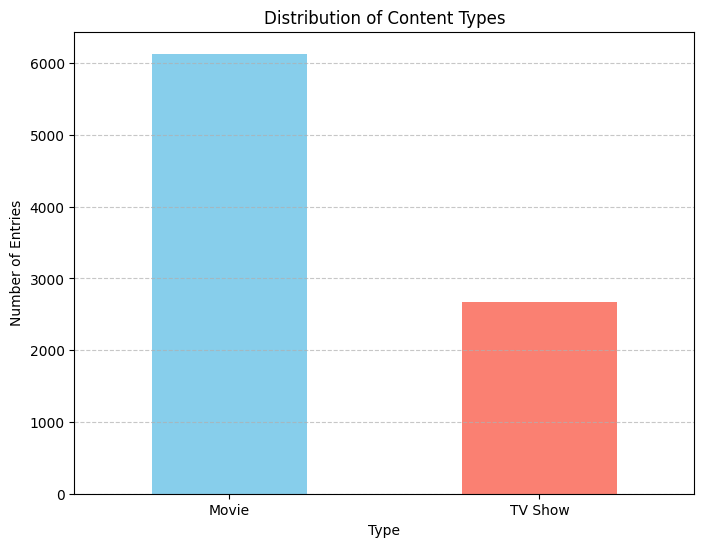

In [66]:
# Plot Content Type Distribution
plt.figure(figsize=(8, 6))
type_distribution.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Content Types')
plt.xlabel('Type')
plt.ylabel('Number of Entries')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### 3.2 Content Addition by Year and Type

   year_added     type  count
0      2008.0    Movie      1
1      2008.0  TV Show      1
2      2009.0    Movie      2
3      2010.0    Movie      1
4      2011.0    Movie     13


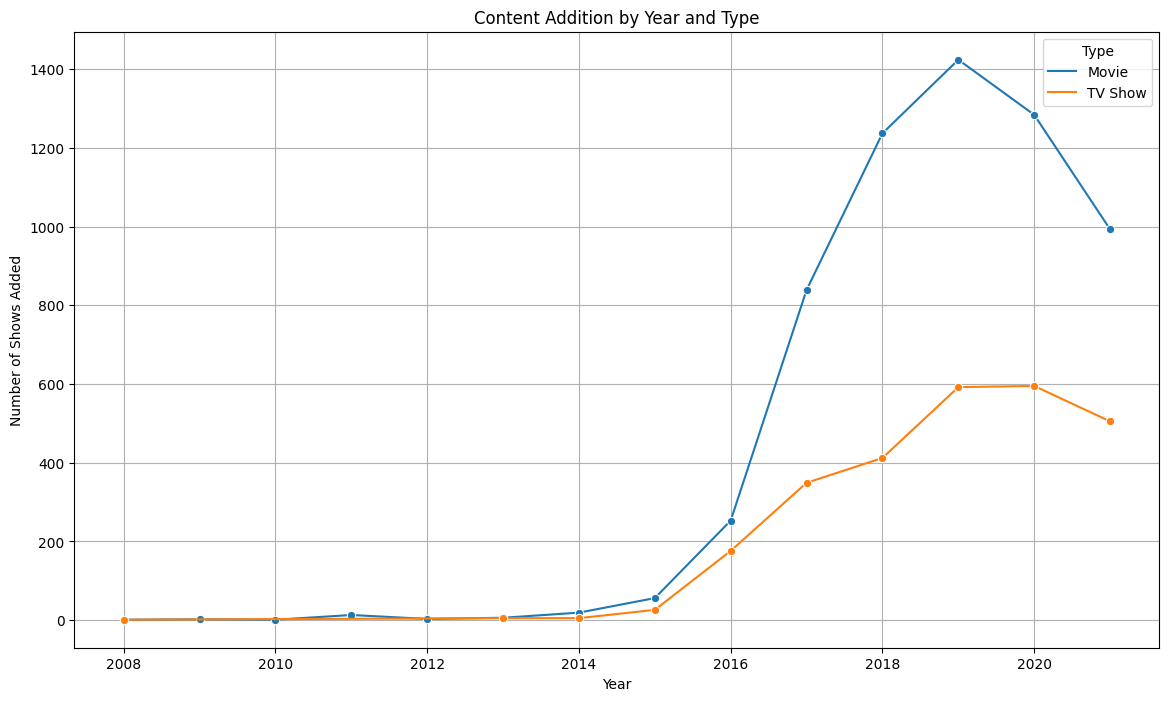

In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('data/netflix_titles.csv')

# Convert 'date_added' to datetime format
df['date_added'] = pd.to_datetime(df['date_added'])

# Extract year from 'date_added'
df['year_added'] = df['date_added'].dt.year

# Group by year and type, then count the number of entries
content_by_year_and_type = df.groupby(['year_added', 'type']).size().reset_index(name='count')

# Display the first few rows of the prepared DataFrame
print(content_by_year_and_type.head())

# Plotting
plt.figure(figsize=(14, 8))

# Use seaborn to create a line plot
sns.lineplot(data=content_by_year_and_type, x='year_added', y='count', hue='type', marker='o')

plt.title('Content Addition by Year and Type')
plt.xlabel('Year')
plt.ylabel('Number of Shows Added')
plt.legend(title='Type')
plt.grid(True)

# Display the plot
plt.show()


### 3.3 Genre Distribution

In [69]:
# Split genres and count occurrences
genre_counts = df['listed_in'].str.split(',', expand=True).stack().value_counts()
print(genre_counts)

 International Movies        2624
Dramas                       1600
Comedies                     1210
Action & Adventure            859
Documentaries                 829
                             ... 
Romantic Movies                 3
Spanish-Language TV Shows       2
LGBTQ Movies                    1
TV Sci-Fi & Fantasy             1
Sports Movies                   1
Length: 73, dtype: int64


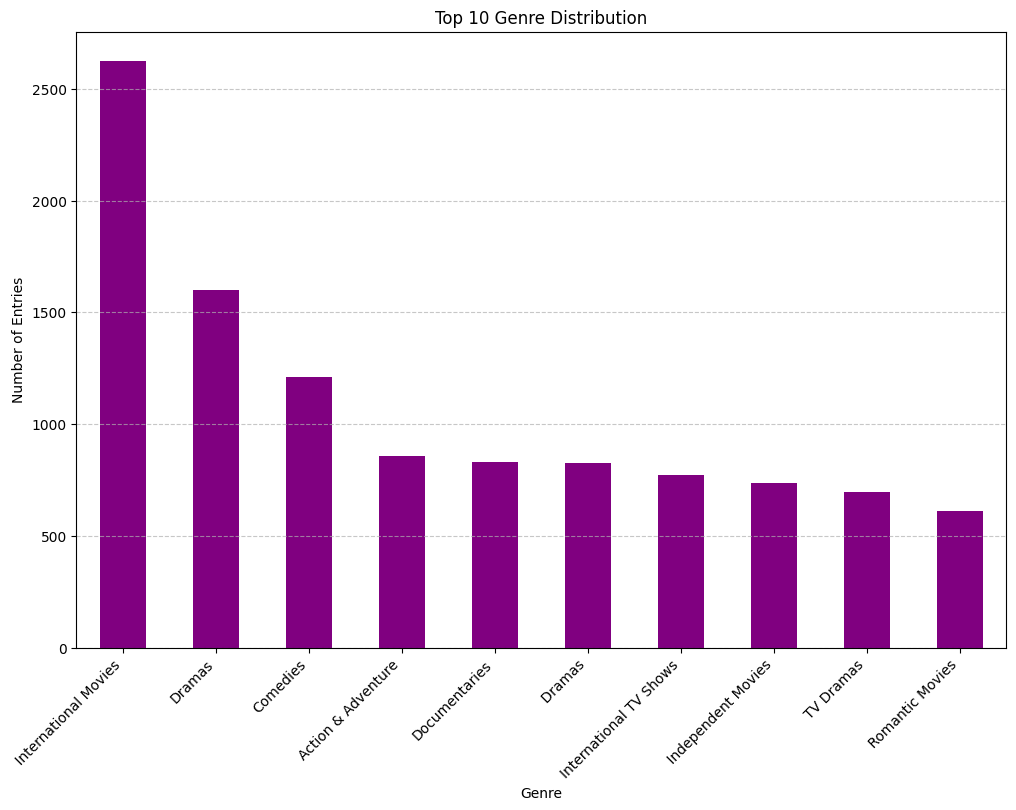

In [70]:
# Split genres and count occurrences
genre_counts = df['listed_in'].str.split(',', expand=True).stack().value_counts()

# Plot Genre Distribution
plt.figure(figsize=(12, 8))
genre_counts.head(10).plot(kind='bar', color='purple')
plt.title('Top 10 Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Number of Entries')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### 3.4 Content Distribution by Country

In [71]:
country_distribution = df['country'].value_counts()
print(country_distribution)

United States                             2818
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 748, dtype: int64


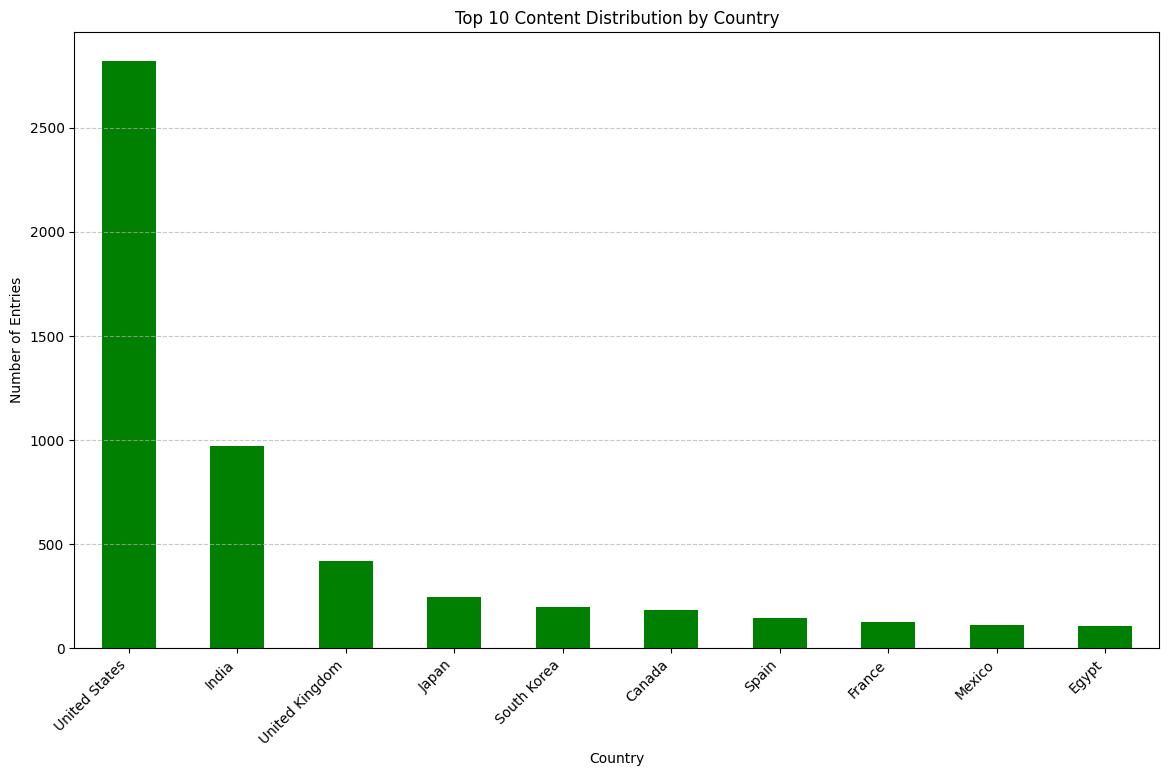

In [72]:
# Compute country distribution
country_distribution = df['country'].value_counts()

# Plot Content Distribution by Country
plt.figure(figsize=(14, 8))
top_countries = country_distribution.head(10)  # Get top 10 countries
top_countries.plot(kind='bar', color='green')
plt.title('Top 10 Content Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Number of Entries')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [73]:
# Timeseries Analysis

In [74]:
cleaned_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,number
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1.0
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1.0
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2.0
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Unknown,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan",2016-03-09,2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,96.0
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",158.0
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,88.0
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",88.0


In [75]:
# -- First time series Graph - Average Movie/season length over time --

# Preprocessing for timeseries on movies length/season 
movies_df['year_added'] = movies_df['date_added'].dt.year
series_df['year_added'] = series_df['date_added'].dt.year

In [76]:
# Split by type, groupby year added
movies_avg_length = movies_df.groupby('year_added')['number'].mean()
series_avg_seasons = series_df.groupby('year_added')['number'].mean()

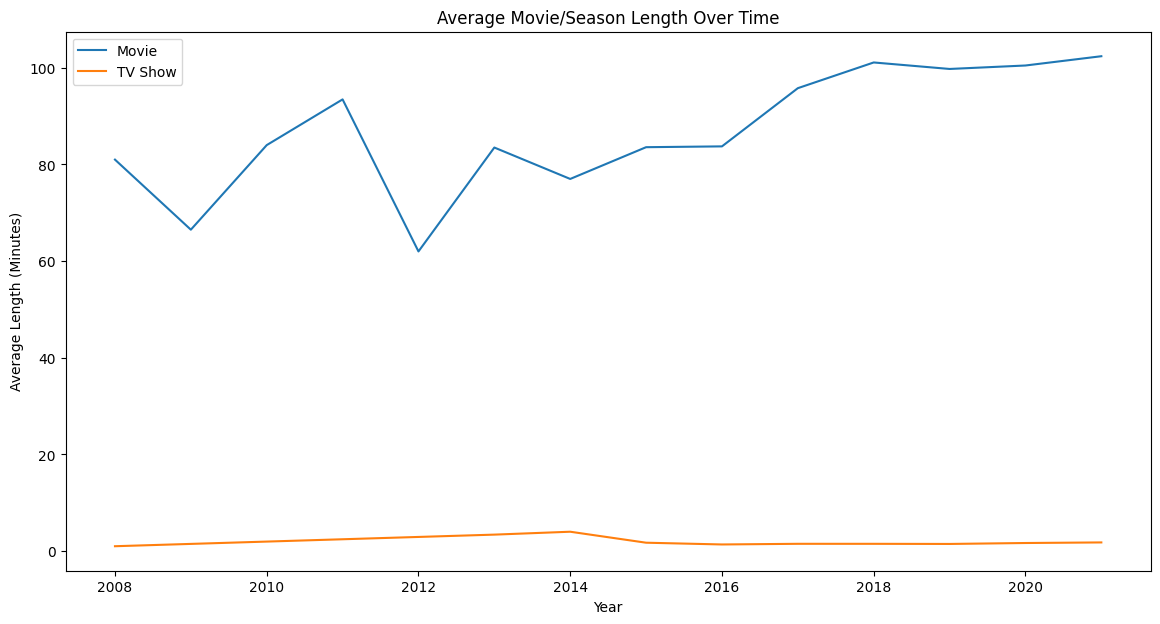

In [77]:
# Final plot 
plt.figure(figsize=(14, 7))
plt.title('Average Movie/Season Length Over Time')
movies_avg_length.plot()
series_avg_seasons.plot()
plt.xlabel('Year')
plt.ylabel('Average Length (Minutes)')
plt.legend(['Movie','TV Show'])

In [78]:
# -- Second time seires - Counts of shows/movies added by country over time -- 

In [79]:
# Copy cleaned_df into new one to format for this plot
country_time_series = cleaned_df.copy()
country_time_series['year_added'] = country_time_series['date_added'].dt.year

In [80]:
# Preprocess new dataframe
# Split the 'country' column to separte out multiple countries on each row
country_time_series['country'] = country_time_series['country'].str.split(', ')


In [81]:
country_time_series

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,number,year_added
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",[South Africa],2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2.0,2021.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",[Unknown],2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1.0,2021.0
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,[Unknown],2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1.0,2021.0
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",[India],2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2.0,2021.0
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",[Unknown],2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,1.0,2021.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","[United Arab Emirates, Jordan]",2016-03-09,2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,96.0,2016.0
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",[United States],2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",158.0,2019.0
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",[United States],2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,88.0,2019.0
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",[United States],2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",88.0,2020.0


In [82]:
# Explode new data frame create new duplicate rows but with each different country
country_exploded = country_time_series.explode('country')

In [83]:
# Value counts to identify the largest 10 countries as the country is set too large to plot all of them
country_totals = country_exploded['country'].value_counts()

In [84]:
# Get top 10 countries
top_10_countries = country_totals.nlargest(10).index

In [85]:
# Get all the rows from the exploded data frame that feature these top 10 countries
df_top_10 = country_exploded[country_exploded['country'].isin(top_10_countries)]

In [86]:
df_top_10

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,number,year_added
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1.0,2021.0
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1.0,2021.0
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2.0,2021.0
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Unknown,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,1.0,2021.0
10,s11,TV Show,"Vendetta: Truth, Lies and The Mafia",Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...","Sicily boasts a bold ""Anti-Mafia"" coalition. B...",1.0,2021.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8799,s8800,Movie,Zenda,Avadhoot Gupte,"Santosh Juvekar, Siddharth Chandekar, Sachit P...",India,2018-02-15,2009,TV-14,120 min,"Dramas, International Movies",A change in the leadership of a political part...,120.0,2018.0
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",158.0,2019.0
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,88.0,2019.0
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",88.0,2020.0


In [87]:
country_counts_top_10 = df_top_10.groupby(['year_added', 'country']).size().unstack().fillna(0)

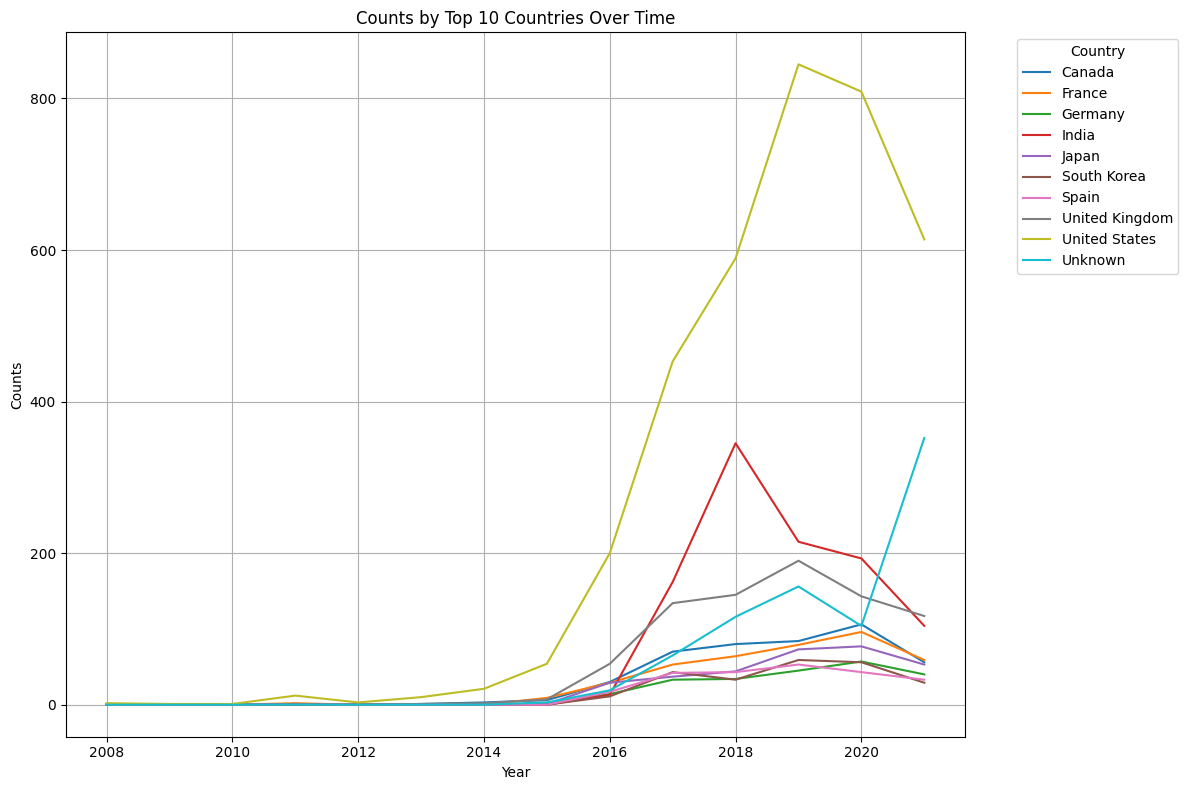

In [88]:
# Final Plot 
plt.figure(figsize=(12, 8))

# Plot each of the top 10 country's counts over time
for country in country_counts_top_10.columns:
    plt.plot(country_counts_top_10.index, country_counts_top_10[country], label=country)

plt.xlabel('Year')
plt.ylabel('Counts')
plt.title('Counts by Top 10 Countries Over Time')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

## Sabeeha's Notebook Workings

# Netflix Titles Dataset 

## 1. Setup

### 1.1 Import Libraries

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy import stats

### 1.2 Load the Dataset

In [90]:
df = pd.read_csv('data/cleaned_data.csv')
df.head()

,Unnamed: 0,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,number
0,1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2.0
1,2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1.0
2,3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1.0
3,4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2.0
4,5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Unknown,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,1.0


## 2. Data Exploration

### Content Type Distribution

In [91]:
type_distribution = df['type'].value_counts()
print(type_distribution)

Movie      6075
TV Show    2610
Name: type, dtype: int64


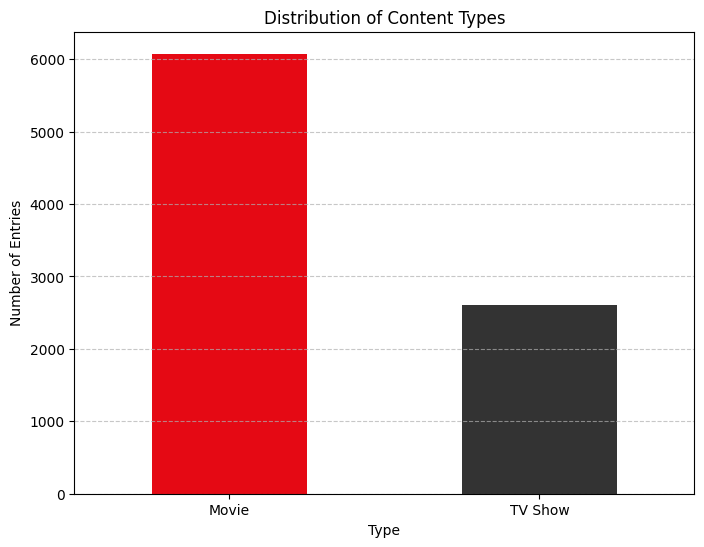

In [92]:
netflix_colours = ['#E50914', '#333333']
plt.figure(figsize=(8, 6))
type_distribution.plot(kind='bar', color=netflix_colours)
plt.title('Distribution of Content Types')
plt.xlabel('Type')
plt.ylabel('Number of Entries')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Content Addition by Year and Type

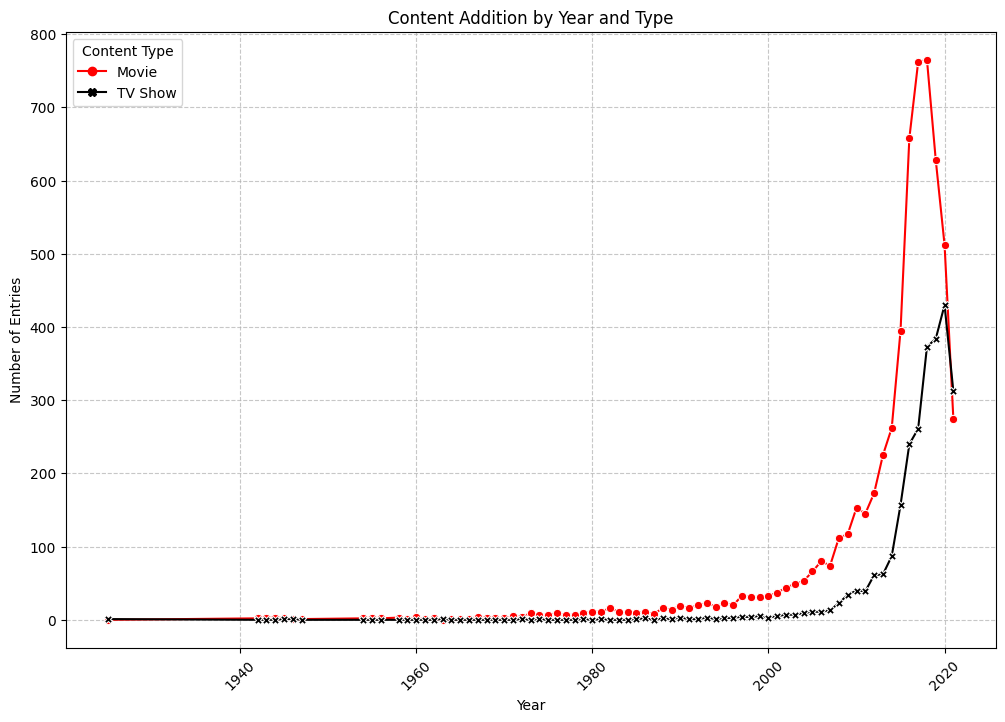

In [93]:
content_by_year_type = df.groupby(['release_year', 'type']).size().unstack().fillna(0)

custom_palette = {'Movie': 'red', 'TV Show': 'black'}
plt.figure(figsize=(12, 8))
sns.lineplot(data=content_by_year_type, palette=custom_palette, markers=True, dashes=False)
plt.title('Content Addition by Year and Type')
plt.xlabel('Year')
plt.ylabel('Number of Entries')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Content Type')
plt.show()

### Genre Distribution

In [94]:
genre_counts = df['listed_in'].str.split(',', expand=True).stack().value_counts()
print(genre_counts)

 International Movies        2595
Dramas                       1584
Comedies                     1198
Action & Adventure            849
Documentaries                 823
                             ... 
Romantic Movies                 3
Spanish-Language TV Shows       2
TV Sci-Fi & Fantasy             1
LGBTQ Movies                    1
Sports Movies                   1
Length: 73, dtype: int64


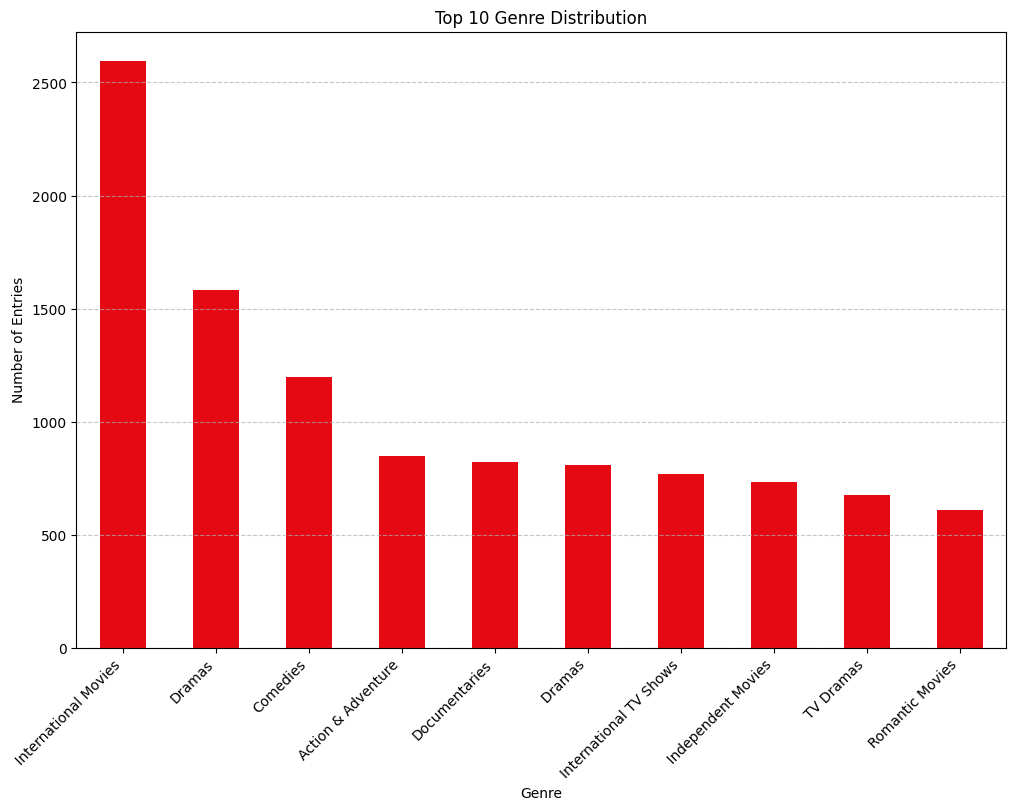

In [95]:
genre_counts = df['listed_in'].str.split(',', expand=True).stack().value_counts()
plt.figure(figsize=(12, 8))
netflix_colors = ['#E50914'] * 10 
genre_counts.head(10).plot(kind='bar', color=netflix_colors)
plt.title('Top 10 Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Number of Entries')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Content Distribution by Country

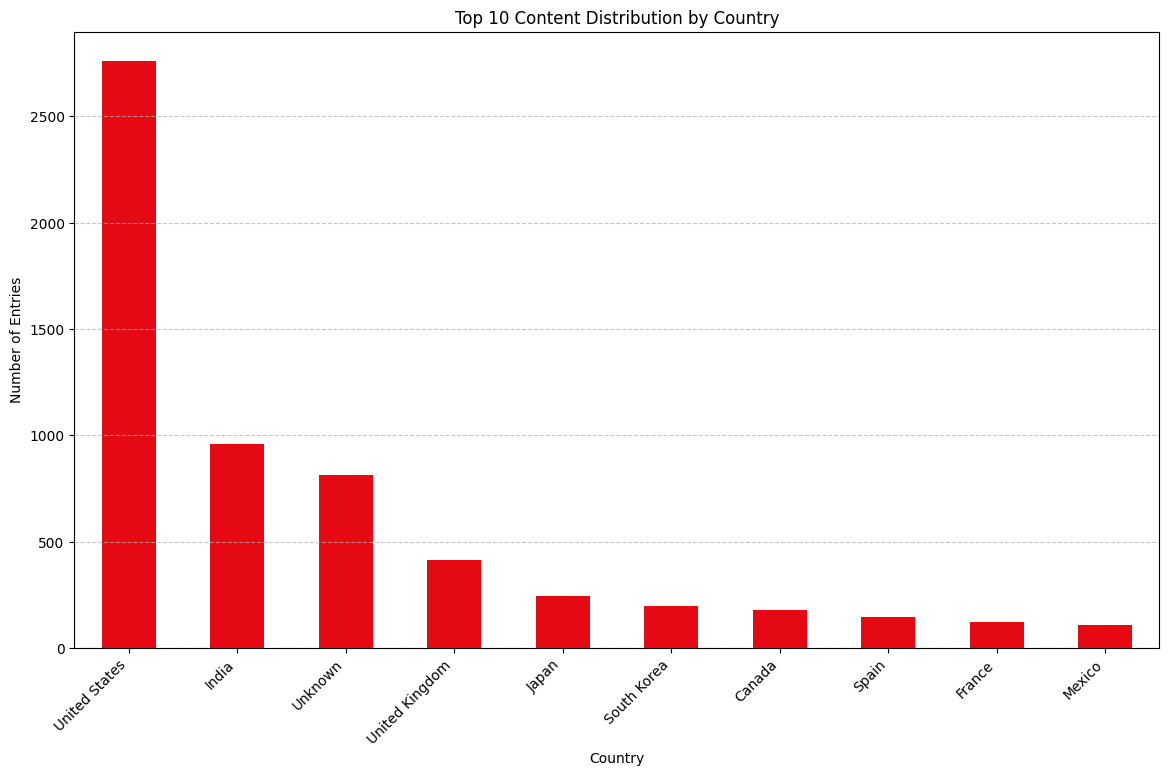

In [96]:
country_distribution = df['country'].value_counts()
plt.figure(figsize=(14, 8))
top_countries = country_distribution.head(10)
netflix_red = '#E50914'
top_countries.plot(kind='bar', color=netflix_red)

plt.title('Top 10 Content Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Number of Entries')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Netflix Userbase Dataset 

## 1. Setup

### 1.1 Import Libraries

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [112]:
df = pd.read_csv('data/netflix_userbase.csv')
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [114]:
df['Join Date'] = pd.to_datetime(df['Join Date'], format='%d-%m-%y')
df['Last Payment Date'] = pd.to_datetime(df['Last Payment Date'], format='%d-%m-%y')

# Display the first few rows to verify the changes
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,2022-01-15,2023-06-10,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,2021-09-05,2023-06-22,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,2022-07-10,2023-06-26,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,2023-05-01,2023-06-28,Germany,33,Male,Smartphone,1 Month


In [115]:
missing_values = df.isnull().sum()
print(missing_values)

User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64


In [116]:
df['Subscription Type'] = df['Subscription Type'].str.capitalize()
df['Country'] = df['Country'].str.title()
df['Device'] = df['Device'].str.title()
df['Gender'] = df['Gender'].str.capitalize()

df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,2022-01-15,2023-06-10,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,2021-09-05,2023-06-22,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart Tv,1 Month
3,4,Standard,12,2022-07-10,2023-06-26,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,2023-05-01,2023-06-28,Germany,33,Male,Smartphone,1 Month


In [118]:
df['Subscription Type'] = df['Subscription Type'].str.capitalize()
df['Country'] = df['Country'].str.title()
df['Device'] = df['Device'].str.title()
df['Gender'] = df['Gender'].str.capitalize()
df['Device'] = df['Device'].replace({'Smart Tv': 'Smart TV'})
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,2022-01-15,2023-06-10,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,2021-09-05,2023-06-22,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,2022-07-10,2023-06-26,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,2023-05-01,2023-06-28,Germany,33,Male,Smartphone,1 Month


In [119]:
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")
df = df.drop_duplicates()

print("\nData after removing duplicates:")
print(df.head())


Number of duplicate rows: 0

Data after removing duplicates:
   User ID Subscription Type  Monthly Revenue  Join Date Last Payment Date  \
0        1             Basic               10 2022-01-15        2023-06-10   
1        2           Premium               15 2021-09-05        2023-06-22   
2        3          Standard               12 2023-02-28        2023-06-27   
3        4          Standard               12 2022-07-10        2023-06-26   
4        5             Basic               10 2023-05-01        2023-06-28   

          Country  Age  Gender      Device Plan Duration  
0   United States   28    Male  Smartphone       1 Month  
1          Canada   35  Female      Tablet       1 Month  
2  United Kingdom   42    Male    Smart TV       1 Month  
3       Australia   51  Female      Laptop       1 Month  
4         Germany   33    Male  Smartphone       1 Month  


## 2. Revenue Analysis
### a) Total Revenue

Total Revenue: $31271


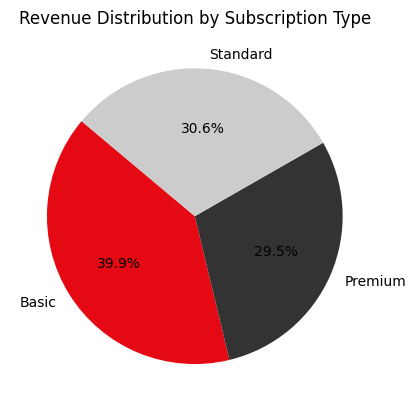

In [122]:
import pandas as pd
import matplotlib.pyplot as plt

revenue_by_subscription = df.groupby('Subscription Type')['Monthly Revenue'].sum()

total_revenue = df['Monthly Revenue'].sum()
print(f"Total Revenue: ${total_revenue}")

colors = ['#E50914', '#333333', '#CCCCCC']

revenue_by_subscription.plot(
    kind='pie', 
    autopct='%1.1f%%', 
    startangle=140, 
    title='Revenue Distribution by Subscription Type', 
    ylabel='', 
    colors=colors
)
plt.show()

### b) Average Revenue per User (ARPU)

Average Revenue per User (ARPU): $12.51


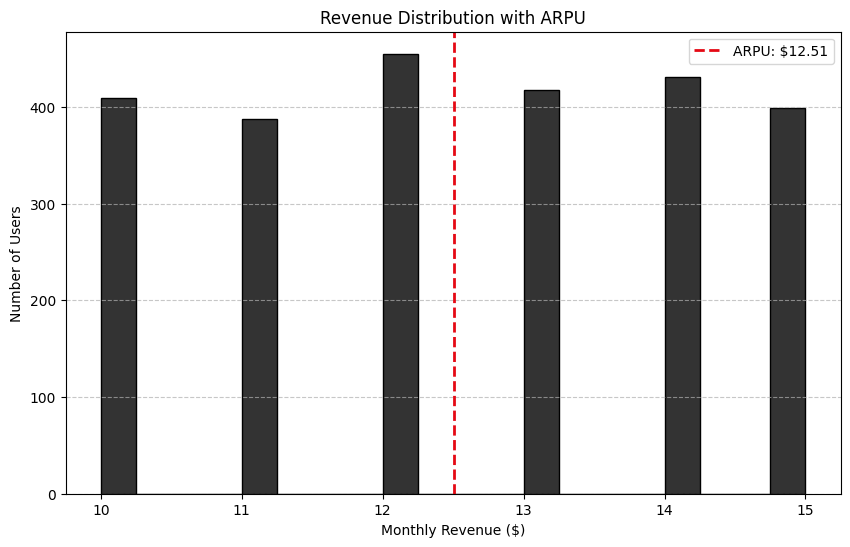

In [123]:
arpu = df['Monthly Revenue'].mean()
print(f"Average Revenue per User (ARPU): ${arpu:.2f}")
revenues = df['Monthly Revenue']
plt.figure(figsize=(10, 6))
plt.hist(revenues, bins=20, color='#333333', edgecolor='black')  # Grey bars with black edges
plt.axvline(arpu, color='#E50914', linestyle='--', linewidth=2, label=f'ARPU: ${arpu:.2f}')  # Red line for ARPU
plt.title('Revenue Distribution with ARPU')
plt.xlabel('Monthly Revenue ($)')
plt.ylabel('Number of Users')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### c) Revenue by Subscription Type

In [124]:
revenue_by_subscription = df.groupby('Subscription Type')['Monthly Revenue'].sum()
print(revenue_by_subscription)

Subscription Type
Basic       12469
Premium      9229
Standard     9573
Name: Monthly Revenue, dtype: int64


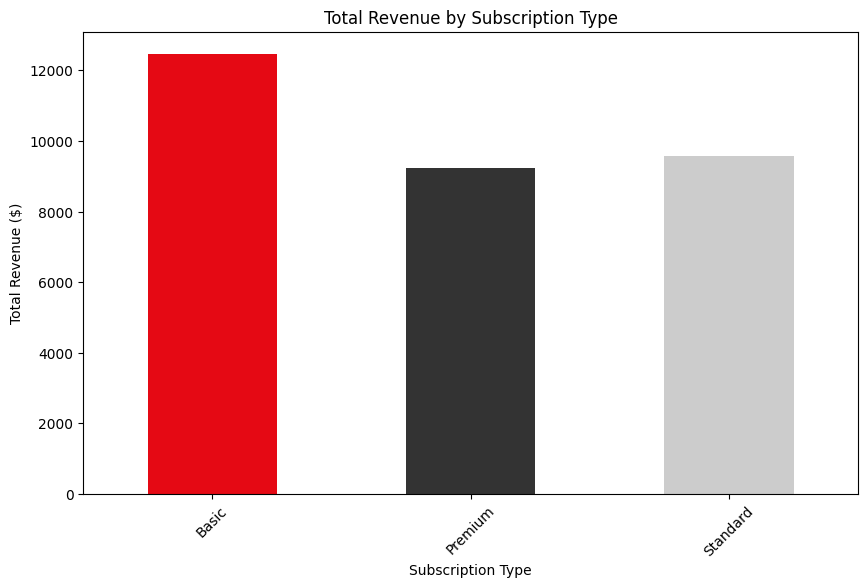

In [125]:
revenue_by_subscription = df.groupby('Subscription Type')['Monthly Revenue'].sum()
plt.figure(figsize=(10, 6))
revenue_by_subscription.plot(kind='bar', color=['#E50914', '#333333', '#CCCCCC'])  # Custom colors to match Netflix
plt.title('Total Revenue by Subscription Type')
plt.xlabel('Subscription Type')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45)
plt.show()

## 3. Churn Analysis
### a) Churn Rate Calculation

In [126]:
# Assume churn is defined as users who have not made a payment in the last month:

last_payment_cutoff = pd.Timestamp('2023-07-01')  # Example cutoff
churned_users = df[df['Last Payment Date'] < last_payment_cutoff]
churn_rate = len(churned_users) / len(df) * 100
print(f"Churn Rate: {churn_rate:.2f}%")

Churn Rate: 34.64%


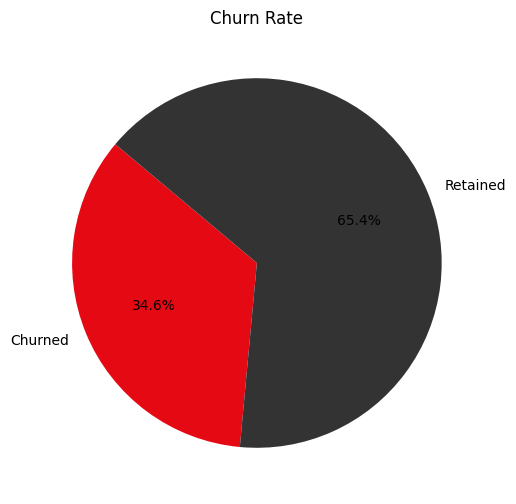

In [127]:
labels = ['Churned', 'Retained']
sizes = [churn_rate, 100 - churn_rate]
colors = ['#E50914', '#333333']  # Red for churned, Dark Grey for retained

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Churn Rate')
plt.show()


### b) Churn by Subscription Type

In [128]:
churn_by_subscription = churned_users['Subscription Type'].value_counts(normalize=True) * 100
print(churn_by_subscription)

Basic       40.646651
Standard    29.907621
Premium     29.445727
Name: Subscription Type, dtype: float64


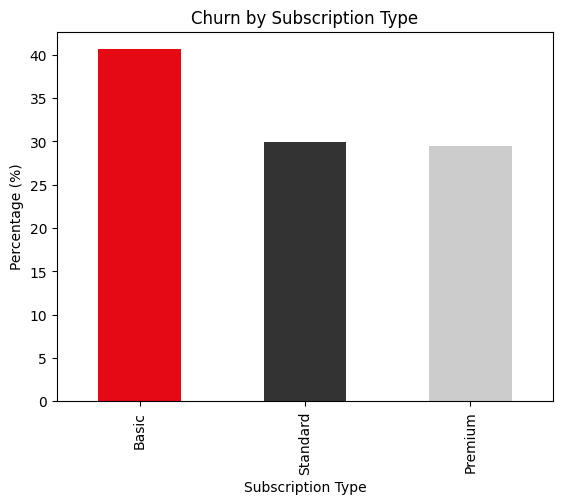

In [129]:
churn_by_subscription.plot(kind='bar', color=['#E50914', '#333333', '#CCCCCC'], title='Churn by Subscription Type')
plt.ylabel('Percentage (%)')
plt.xlabel('Subscription Type')
plt.show()

### c) Churn by Device

In [130]:
churn_by_device = churned_users['Device'].value_counts(normalize=True) * 100
print(churn_by_device)

Laptop        27.367206
Smartphone    26.327945
Tablet        23.325635
Smart TV      22.979215
Name: Device, dtype: float64


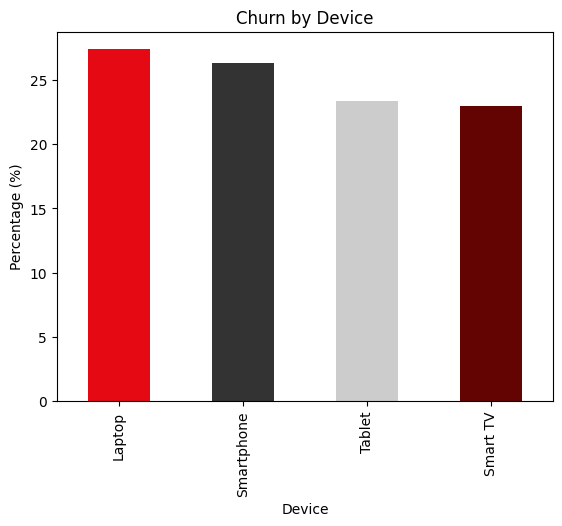

In [131]:
churn_by_device.plot(kind='bar', color=['#E50914', '#333333', '#CCCCCC', '#640402'], title='Churn by Device')
plt.ylabel('Percentage (%)')
plt.xlabel('Device')
plt.show()

## 4. Customer Segmentation
### a) Demographic Segmentation (Example: Age Groups)

Age Group  Gender
26-30      Female    143
           Male      164
31-35      Female    256
           Male      248
36-40      Female    238
           Male      278
41-45      Female    264
           Male      235
46-51      Female    356
           Male      318
Name: User ID, dtype: int64


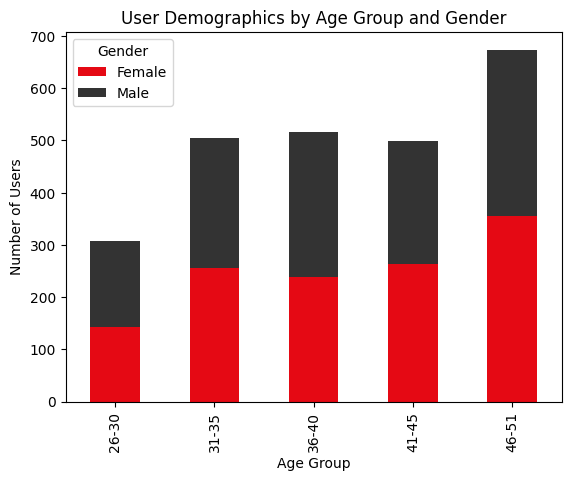

In [139]:
age_bins = [25, 30, 35, 40, 45, 52]  # Adjusted bins with 46-51 in the final range
age_labels = ['26-30', '31-35', '36-40', '41-45', '46-51']  # Updated labels

df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

demographic_segment = df.groupby(['Age Group', 'Gender'])['User ID'].count()
print(demographic_segment)

demographic_segment.unstack().plot(
    kind='bar', 
    stacked=True, 
    color=['#E50914', '#333333'], 
    title='User Demographics by Age Group and Gender'
)
plt.ylabel('Number of Users')
plt.xlabel('Age Group')
plt.show()


### b) Behavioral Segmentation

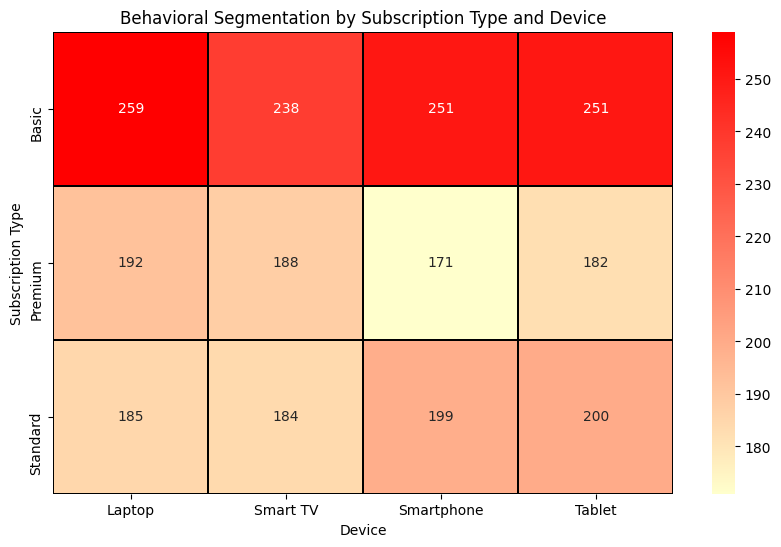

In [146]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors

# Example DataFrame
# df = pd.read_csv('your_data_file.csv')  # Uncomment and adjust if loading data from a CSV

# Calculate the count of users by subscription type and device
behavioral_segment = df.groupby(['Subscription Type', 'Device'])['User ID'].count().unstack()

# Define a simple color map from yellow to red
cmap = mcolors.LinearSegmentedColormap.from_list(
    'yellow_to_red', 
    ['#ffffcc', '#ff0000']
)

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(behavioral_segment, annot=True, fmt="d", cmap=cmap, linewidths=0.5, linecolor='black')
plt.title('Behavioral Segmentation by Subscription Type and Device')
plt.ylabel('Subscription Type')
plt.xlabel('Device')
plt.show()


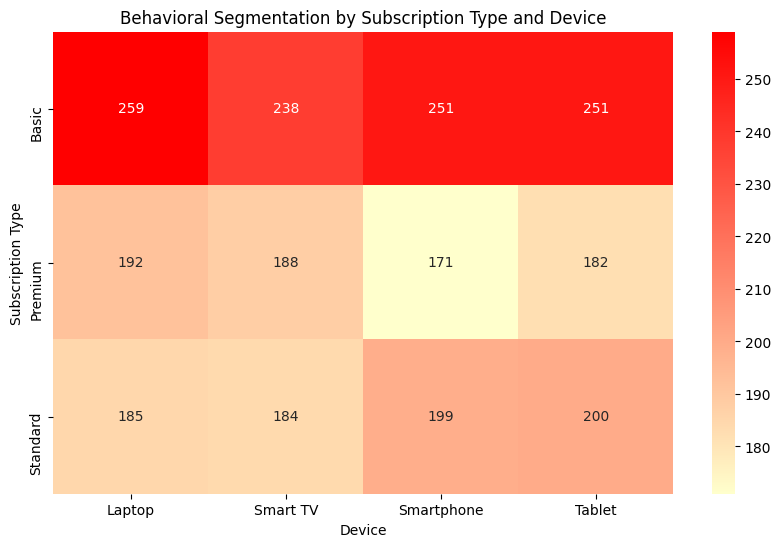

In [145]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

behavioral_segment = df.groupby(['Subscription Type', 'Device'])['User ID'].count().unstack()

cmap = mcolors.LinearSegmentedColormap.from_list(
    'yellow_to_red', 
    ['#ffffcc', '#ff0000']
)

plt.figure(figsize=(10, 6))
sns.heatmap(behavioral_segment, annot=True, fmt="d", cmap=cmap)
plt.title('Behavioral Segmentation by Subscription Type and Device')
plt.ylabel('Subscription Type')
plt.xlabel('Device')
plt.show()


## 5. Subscription Duration Analysis
### a) Average Subscription Duration

Average Subscription Duration: 10.29 months


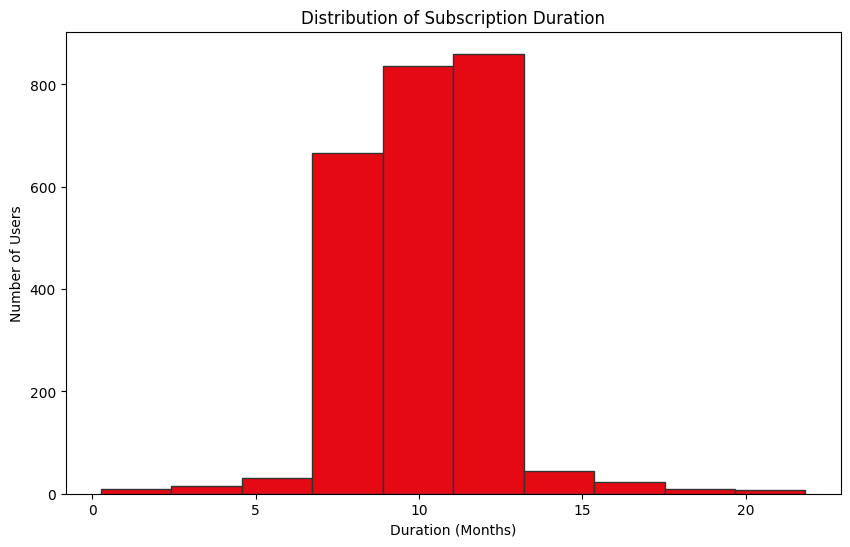

In [147]:
import matplotlib.pyplot as plt

# Calculate subscription duration in months
df['Subscription Duration'] = (df['Last Payment Date'] - df['Join Date']).dt.days / 30
average_duration = df['Subscription Duration'].mean()
print(f"Average Subscription Duration: {average_duration:.2f} months")

plt.figure(figsize=(10, 6))
plt.hist(df['Subscription Duration'], bins=10, color='#E50914', edgecolor='#333333')  # Netflix red and dark grey
plt.title('Distribution of Subscription Duration')
plt.xlabel('Duration (Months)')
plt.ylabel('Number of Users')
plt.show()

### b) Subscription Duration by Type

In [148]:
duration_by_subscription = df.groupby('Subscription Type')['Subscription Duration'].mean()
print(duration_by_subscription)

Subscription Type
Basic       10.243510
Premium     10.252387
Standard    10.377604
Name: Subscription Duration, dtype: float64


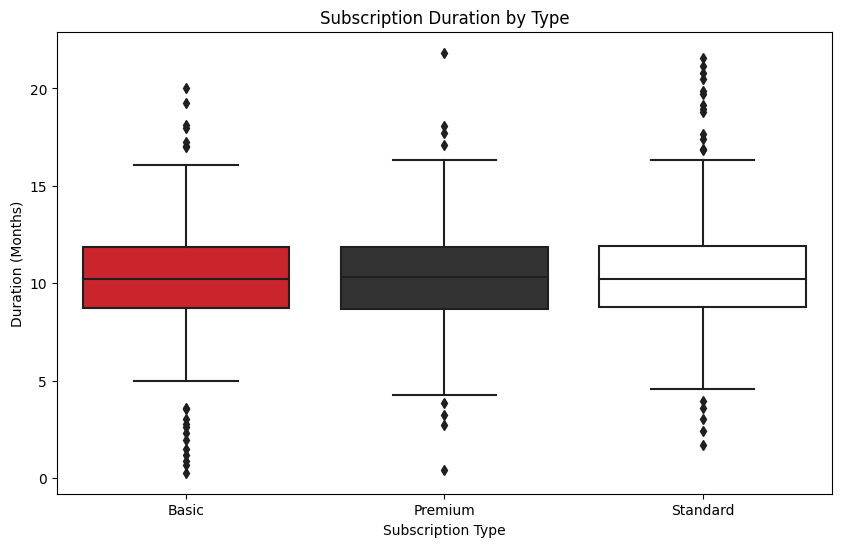

In [149]:
netflix_colors = ['#E50914', '#333333', '#FFFFFF']  # Red, Dark Grey, White

plt.figure(figsize=(10, 6))
sns.boxplot(x='Subscription Type', y='Subscription Duration', data=df, palette=netflix_colors)
plt.title('Subscription Duration by Type')
plt.xlabel('Subscription Type')
plt.ylabel('Duration (Months)')
plt.show()

## 6. Country-Level Insights
### a) Country-wise Revenue

In [150]:
revenue_by_country = df.groupby('Country')['Monthly Revenue'].sum()
print(revenue_by_country)

Country
Australia         2271
Brazil            2285
Canada            3950
France            2307
Germany           2260
Italy             2317
Mexico            2237
Spain             5662
United Kingdom    2318
United States     5664
Name: Monthly Revenue, dtype: int64


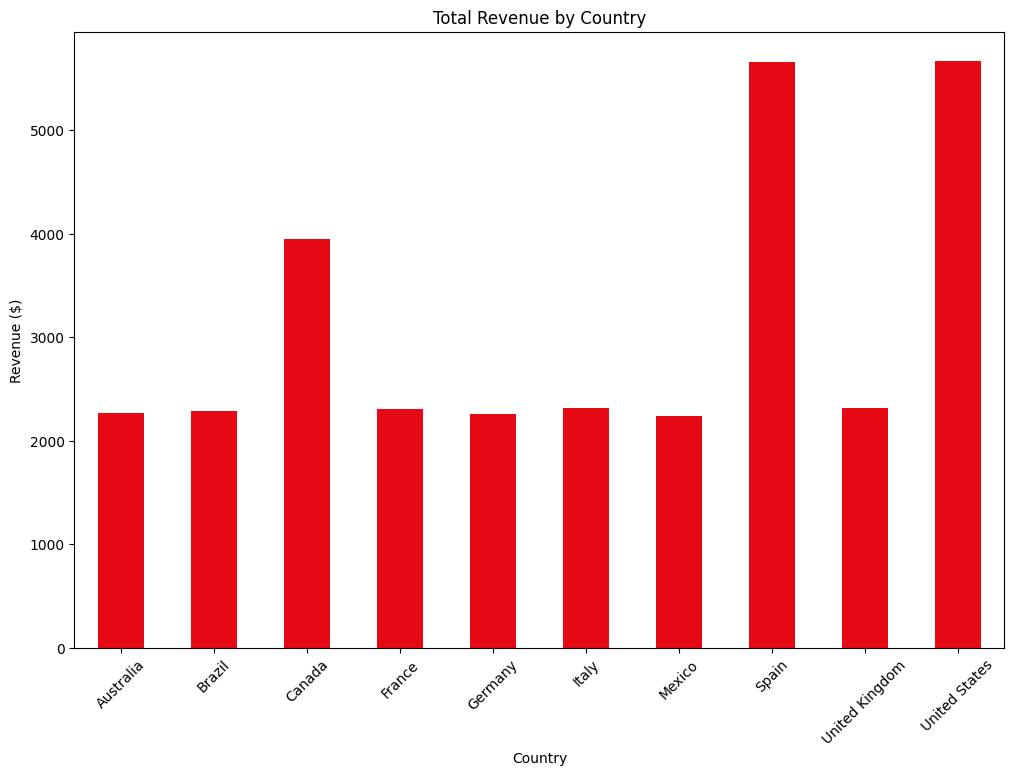

In [151]:
netflix_red = '#E50914'
netflix_black = '#333333'
plt.figure(figsize=(12, 8))
revenue_by_country.plot(kind='bar', color=netflix_red)
plt.title('Total Revenue by Country')
plt.xlabel('Country')
plt.ylabel('Revenue ($)')
plt.xticks(rotation=45)
plt.show()

### b) User Distribution by Country

In [152]:
users_by_country = df['Country'].value_counts(normalize=True) * 100
print(users_by_country)

United States     18.04
Spain             18.04
Canada            12.68
United Kingdom     7.32
Australia          7.32
Germany            7.32
France             7.32
Brazil             7.32
Mexico             7.32
Italy              7.32
Name: Country, dtype: float64


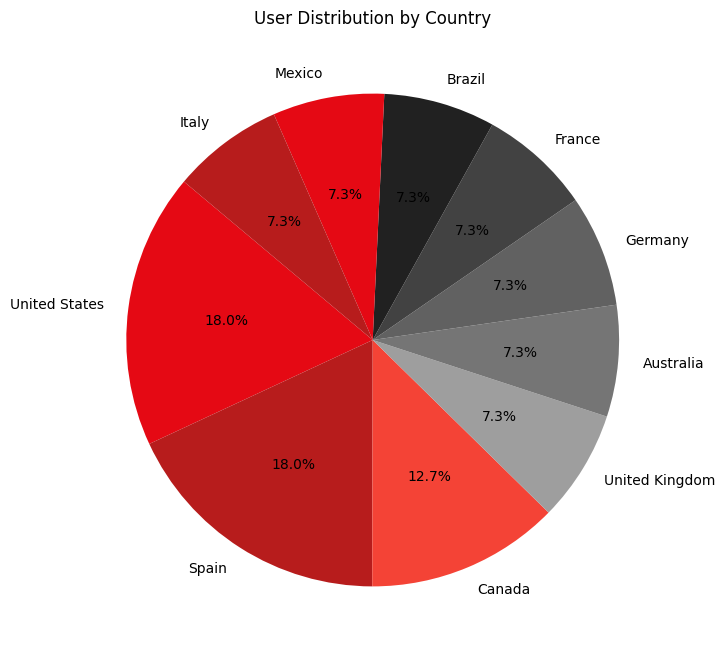

In [153]:
colors = ['#E50914', '#B71C1C', '#F44336', '#9E9E9E', '#757575', '#616161', '#424242', '#212121']

plt.figure(figsize=(10, 8))
users_by_country.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('User Distribution by Country')
plt.ylabel('')
plt.show()


### c) Subscription Type by Country

In [154]:
subscription_by_country = df.groupby(['Country', 'Subscription Type'])['User ID'].count()
print(subscription_by_country)

Country         Subscription Type
Australia       Basic                 31
                Premium              101
                Standard              51
Brazil          Basic                146
                Premium               33
                Standard               4
Canada          Basic                145
                Premium               88
                Standard              84
France          Basic                 36
                Premium              147
Germany         Basic                149
                Premium                3
                Standard              31
Italy           Basic                176
                Premium                4
                Standard               3
Mexico          Basic                  4
                Standard             179
Spain           Basic                110
                Premium              212
                Standard             129
United Kingdom  Basic                  3
                Standar

<Figure size 1200x800 with 0 Axes>

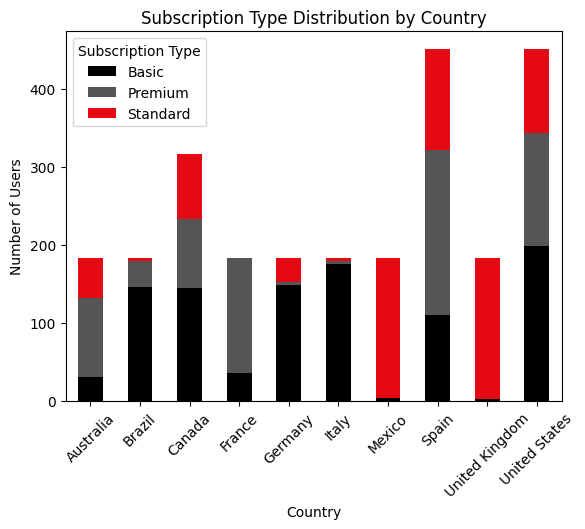

In [155]:
colors = ['#000000', '#555555', '#E50914']  # Black, Grey, Red

plt.figure(figsize=(12, 8))
subscription_by_country.unstack().plot(kind='bar', stacked=True, color=colors[:subscription_by_country.unstack().shape[1]])
plt.title('Subscription Type Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.legend(title='Subscription Type')
plt.show()


## Lorin's Notebook Workings



# 1. Setup
# 1.1 Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy import stats

# 1.2 Load the Dataset

In [2]:
# Load the dataset
df = pd.read_csv('cleaned_data.csv')


# 2. User Analysis 

# 2.1 Loading & Merging Relevant Datasets 

In [3]:
# Loading CSV with popularity data (source = )
pop = pd.read_csv('titles.csv')
pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5850 entries, 0 to 5849
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5850 non-null   object 
 1   title                 5849 non-null   object 
 2   type                  5850 non-null   object 
 3   description           5832 non-null   object 
 4   release_year          5850 non-null   int64  
 5   age_certification     3231 non-null   object 
 6   runtime               5850 non-null   int64  
 7   genres                5850 non-null   object 
 8   production_countries  5850 non-null   object 
 9   seasons               2106 non-null   float64
 10  imdb_id               5447 non-null   object 
 11  imdb_score            5368 non-null   float64
 12  imdb_votes            5352 non-null   float64
 13  tmdb_popularity       5759 non-null   float64
 14  tmdb_score            5539 non-null   float64
dtypes: float64(5), int64(

In [4]:
# Merging with original df 
result = pd.merge(df, pop, on='title', how='outer') 
result.head()

,Unnamed: 0,show_id,type_x,title,director,cast,country,date_added,release_year_x,rating,...,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,1.0,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021.0,TV-MA,...,TV-MA,48.0,['drama'],['ZA'],2.0,NaN,NaN,NaN,10.301,7.900
1,2.0,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021.0,TV-MA,...,TV-MA,46.0,"['action', 'crime', 'drama', 'thriller']",['FR'],1.0,tt13278100,7.0,2553.0,39.002,7.300
2,3.0,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021.0,TV-MA,...,TV-MA,41.0,"['documentation', 'reality']",['US'],1.0,tt15320436,6.6,214.0,1.960,7.000
3,4.0,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021.0,TV-MA,...,TV-MA,39.0,"['drama', 'comedy']",['IN'],2.0,tt9432978,9.1,69316.0,9.584,8.300
4,5.0,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Unknown,2021-09-24,2021.0,TV-MA,...,TV-MA,64.0,"['fantasy', 'horror', 'action', 'drama', 'scifi']",['US'],1.0,tt10574558,7.7,106385.0,73.108,7.613


# 2.2 IMDb Score & Genre Analysis 

In [47]:
# Counting genre entries 

# Define a function to count genres
def count_genre_keywords(genres):
    if isinstance(genres, str):
        genres = genres.lower()
        genre_counts = {
            'Drama': 0,
            'Comedy': 0,
            'Horror': 0,
            'Action': 0,
            'Thriller': 0,
            'Romance': 0,
            'Documentary': 0,
            'Sci-Fi': 0,
            'Fantasy': 0,
            'Animation': 0,
            'Other': 0
        }
        
        # Increment counts based on the presence of keywords
        if 'drama' in genres:
            genre_counts['Drama'] += 1
        if 'comedy' in genres:
            genre_counts['Comedy'] += 1
        if 'horror' in genres:
            genre_counts['Horror'] += 1
        if 'action' in genres:
            genre_counts['Action'] += 1
        if 'thriller' in genres:
            genre_counts['Thriller'] += 1
        if 'romance' in genres:
            genre_counts['Romance'] += 1
        if 'documentation' in genres:
            genre_counts['Documentary'] += 1
        if 'scifi' in genres or 'science fiction' in genres:
            genre_counts['Sci-Fi'] += 1
        if 'fantasy' in genres:
            genre_counts['Fantasy'] += 1
        if 'animation' in genres:
            genre_counts['Animation'] += 1
        
        # If none of the specified genres are found, increment 'Other'
        if sum(genre_counts.values()) == 0:
            genre_counts['Other'] += 1
        
        return genre_counts
    else:
        # Handle non-string or NaN cases by categorizing as 'Unknown'
        return {
            'Drama': 0,
            'Comedy': 0,
            'Horror': 0,
            'Action': 0,
            'Thriller': 0,
            'Romance': 0,
            'Documentary': 0,
            'Sci-Fi': 0,
            'Fantasy': 0,
            'Animation': 0,
            'Other': 1  # Count as 'Other' if genre is missing or not a string
        }

# Apply the function and aggregate the results
highly_rated_genres = result[result['imdb_score'] > 7]['genres'].apply(count_genre_keywords)

# Sum up the counts across all films
genre_totals = highly_rated_genres.apply(pd.Series).sum()

# Display the genre totals
genre_totals = genre_totals.sort_values(ascending=False)
print(genre_totals)



Drama          1084
Comedy          703
Documentary     469
Thriller        344
Action          339
Romance         294
Animation       250
Fantasy         220
Sci-Fi          205
Horror           83
Other            42
dtype: int64


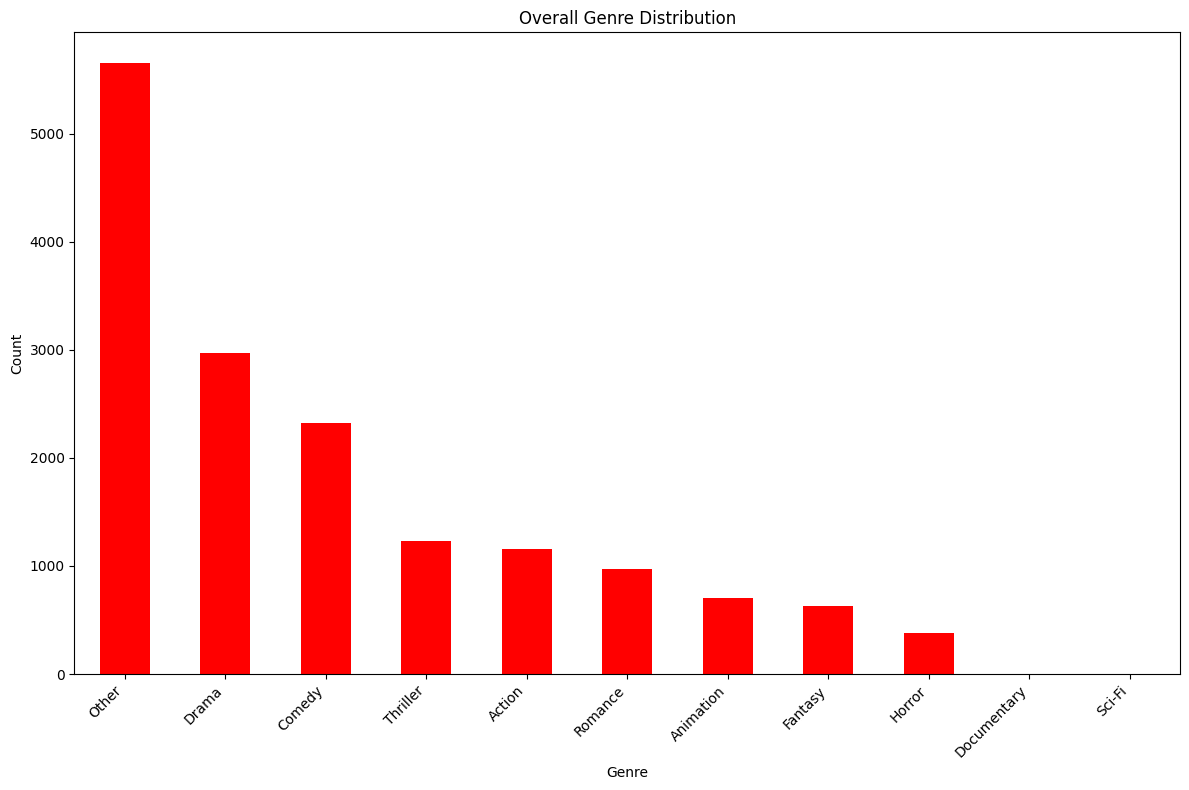

In [72]:
# Plotting genre distribution 
# Apply the function to count genres across all films
all_genres_counts = result['genres'].apply(count_genre_keywords)

# Convert the counts into a DataFrame and sum them up
genre_totals_all = pd.DataFrame(all_genres_counts.tolist()).sum()
genre_totals_all = genre_totals_all.sort_values(ascending=False)

# Plot the genre totals
plt.figure(figsize=(12, 8))
genre_totals_all.plot(kind='bar', color='red')

# Customize the plot
plt.title('Overall Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjust layout to prevent clipping

# Show the plot
plt.show()

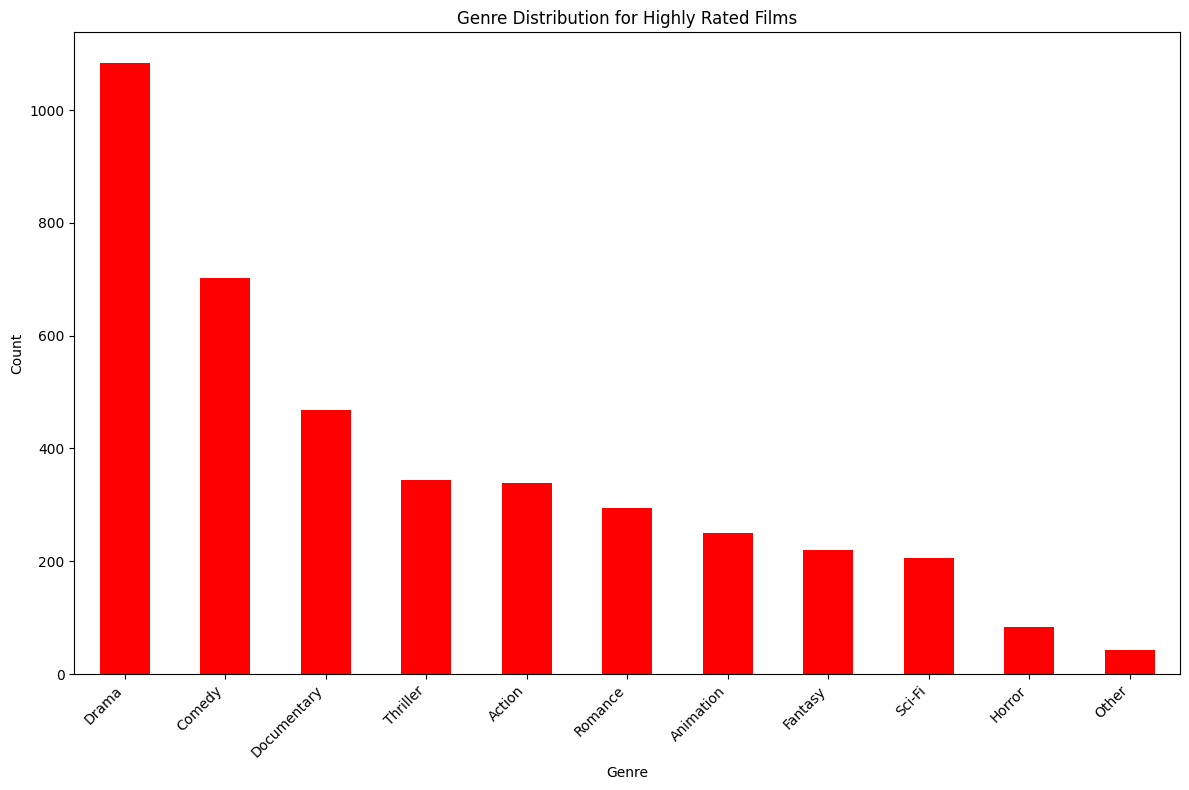

In [71]:
# Plotting genre distribution for highly rated films 

# Plot the genre totals in red
plt.figure(figsize=(12, 8))
genre_totals.plot(kind='bar', color='red')

# Customize the plot
plt.title('Genre Distribution for Highly Rated Films')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjust layout to prevent clipping

# Show the plot
plt.show()

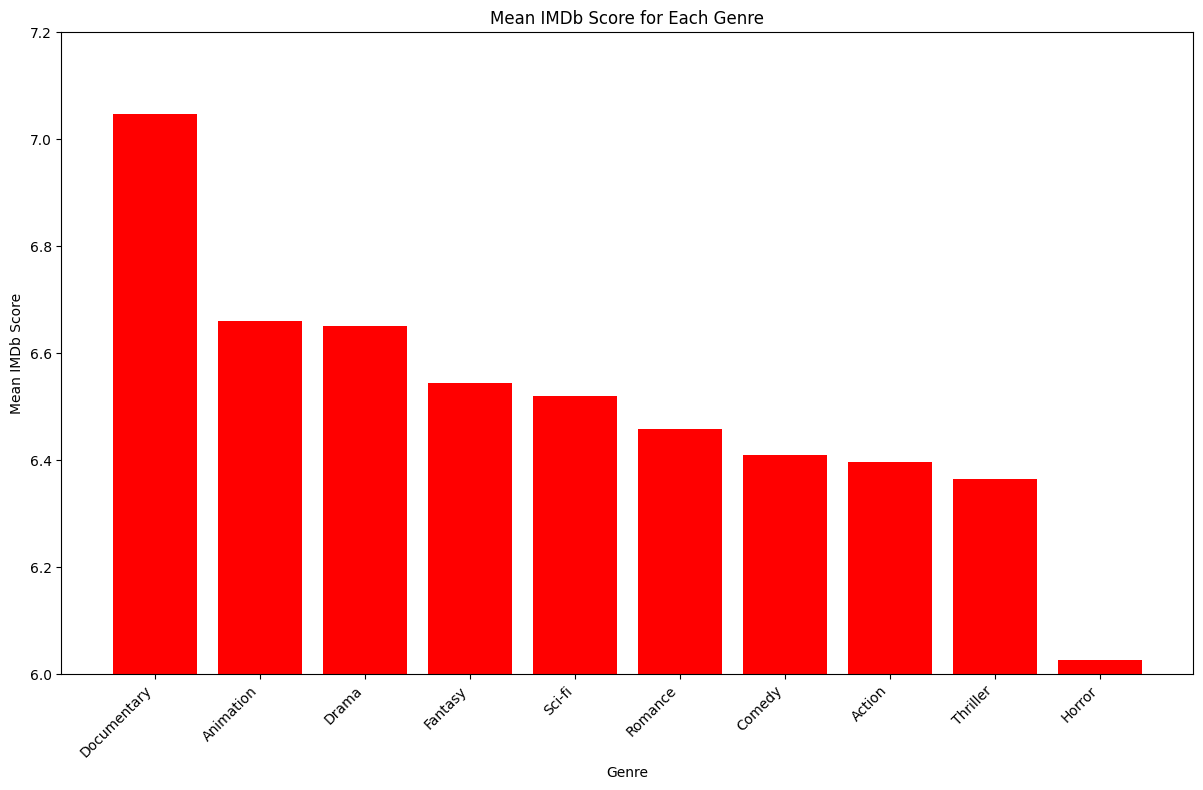

In [94]:
# plotting mean IMDb score
def mean_imdb_score_for_genre(keyword):
    # Filter films that contain the genre keyword
    filtered = result[result['genres'].str.contains(keyword, case=False, na=False)]
    # Return the mean IMDb score for the filtered films
    return filtered['imdb_score'].mean()

# Rename and capitalize genre names in the DataFrame
result['genres'] = result['genres'].replace(
    {'documentation': 'Documentary', 'scifi': 'Sci-fi'}, regex=True
).str.capitalize()

# Define a list of genre keywords with capitalized names
genre_keywords = [
    'Drama', 'Comedy', 'Horror', 'Action', 'Thriller', 
    'Romance', 'Documentary', 'Sci-fi', 'Fantasy', 'Animation'
]

# Calculate the mean IMDb score for each genre keyword
mean_scores = {keyword: mean_imdb_score_for_genre(keyword) for keyword in genre_keywords}

# Convert the results into a DataFrame for easier plotting
mean_scores_df = pd.DataFrame(list(mean_scores.items()), columns=['Genre', 'Mean IMDb Score'])

# Sort the DataFrame by mean IMDb score in descending order
mean_scores_df = mean_scores_df.sort_values(by='Mean IMDb Score', ascending=False)

# Plot the mean IMDb scores
plt.figure(figsize=(12, 8))
plt.bar(mean_scores_df['Genre'], mean_scores_df['Mean IMDb Score'], color='red')

# Customize the plot
plt.title('Mean IMDb Score for Each Genre')
plt.xlabel('Genre')
plt.ylabel('Mean IMDb Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjust layout to prevent clipping
plt.ylim(6, 7.2)  # Adjust y-axis limit to focus on the relevant range

# Show the plot
plt.show()

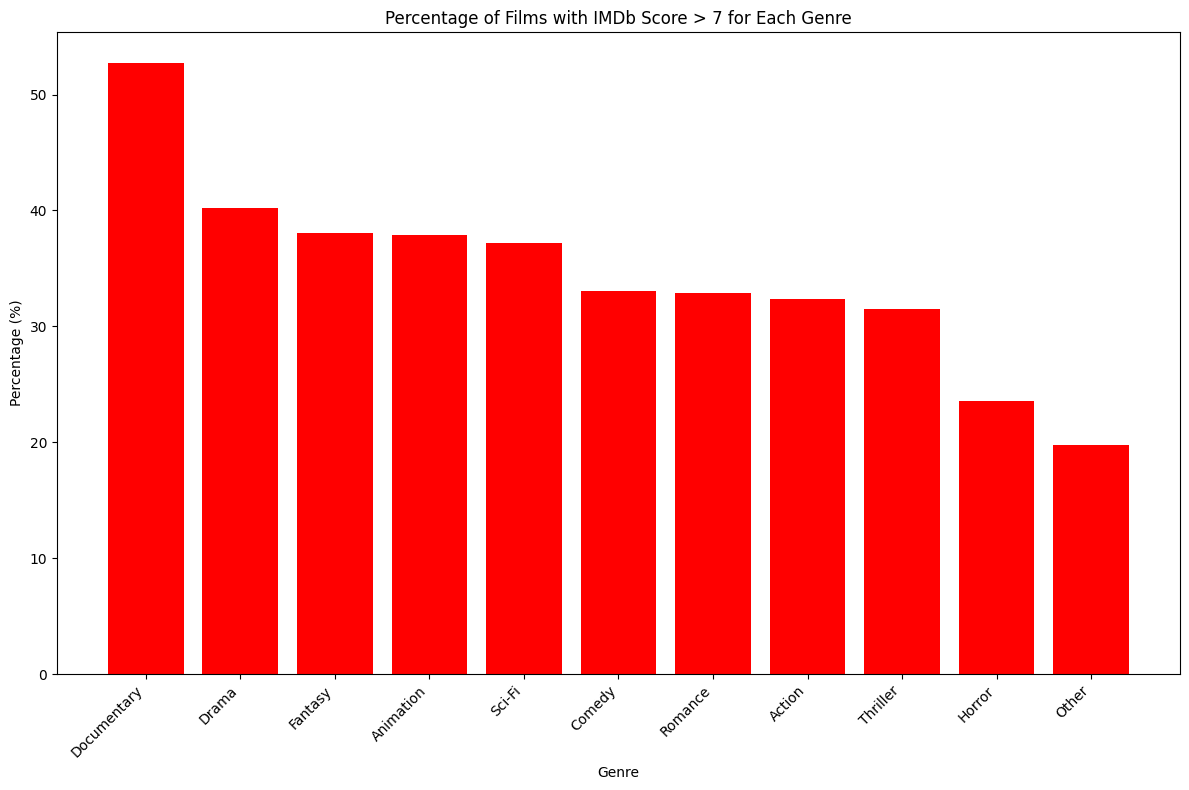

In [69]:
# Correct genre names in the DataFrame
def update_genre_names(genre_str):
    if isinstance(genre_str, str):
        genre_str = genre_str.lower()
        genre_str = genre_str.replace('documentation', 'documentary')
        genre_str = genre_str.replace('scifi', 'sci-fi')
    return genre_str

# Apply the function to update genre names
result['genres'] = result['genres'].apply(update_genre_names)

# Define a function to calculate counts for each genre keyword
def count_genre_occurrences(genres):
    genre_counts = {
        'Drama': 0,
        'Comedy': 0,
        'Horror': 0,
        'Action': 0,
        'Thriller': 0,
        'Romance': 0,
        'Documentary': 0,  # Corrected from 'Documentation'
        'Sci-Fi': 0,       # Corrected from 'SciFi'
        'Fantasy': 0,
        'Animation': 0,
        'Other': 0         # Include 'Other'
    }
    if isinstance(genres, str):
        genres = genres.lower()
        found_genre = False
        for genre in genre_counts.keys():
            if genre.lower() in genres:
                genre_counts[genre] += 1
                found_genre = True
        if not found_genre:
            genre_counts['Other'] += 1
    return genre_counts

# Apply the function to count genres
genre_counts_all = result['genres'].apply(count_genre_occurrences)

# Convert the counts into a DataFrame and sum them up
total_genre_counts = pd.DataFrame(genre_counts_all.tolist()).sum()

# Calculate high IMDb score counts (score >= 7)
high_score_counts = result[result['imdb_score'] >= 7]['genres'].apply(count_genre_occurrences)
high_score_counts = pd.DataFrame(high_score_counts.tolist()).sum()

# Calculate percentage of high IMDb score counts
percentage_high_score = (high_score_counts / total_genre_counts) * 100

# Sort the percentages in descending order
percentage_high_score = percentage_high_score.sort_values(ascending=False)

# Plot the percentages
plt.figure(figsize=(12, 8))
plt.bar(percentage_high_score.index, percentage_high_score, color='red')

# Customize the plot
plt.title('Percentage of Films with IMDb Score > 7 for Each Genre')
plt.xlabel('Genre')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjust layout to prevent clipping

# Show the plot
plt.show()

# 2.3 IMDb Score & Release Year 

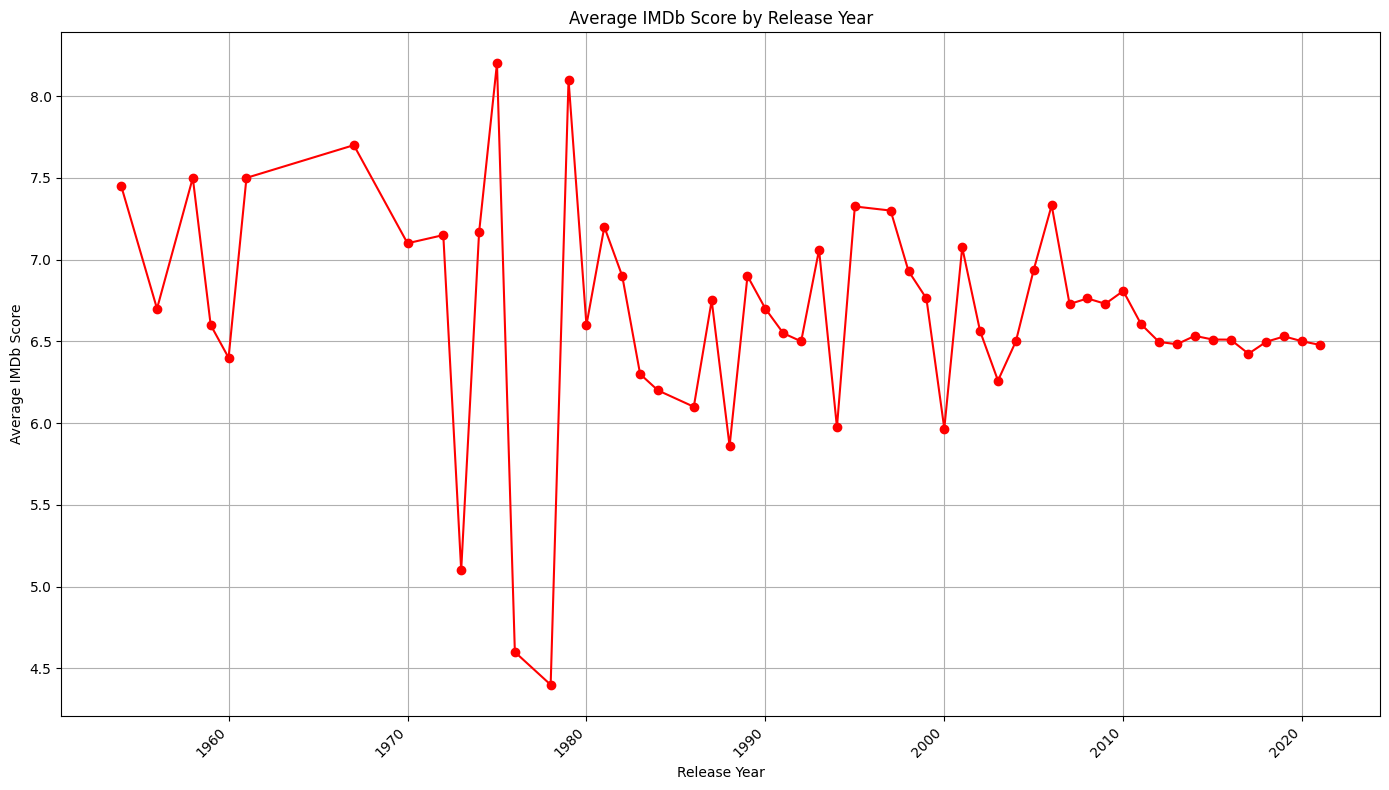

In [77]:
# Ensure 'release_year' is in the correct format (int or str)
# Use .loc to avoid SettingWithCopyWarning
result.loc[:, 'release_year'] = pd.to_numeric(result['release_year'], errors='coerce').astype('Int64')

# Drop rows where 'release_year' or 'imdb_score' is missing
result = result.dropna(subset=['release_year', 'imdb_score'])

# Group by 'release_year' and calculate the mean IMDb score for each year
average_scores_by_year = result.groupby('release_year')['imdb_score'].mean()

# Plot the average IMDb scores by release year
plt.figure(figsize=(14, 8))
plt.plot(average_scores_by_year.index, average_scores_by_year, marker='o', linestyle='-', color='red')

# Customize the plot
plt.title('Average IMDb Score by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Average IMDb Score')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent clipping

# Show the plot
plt.show()

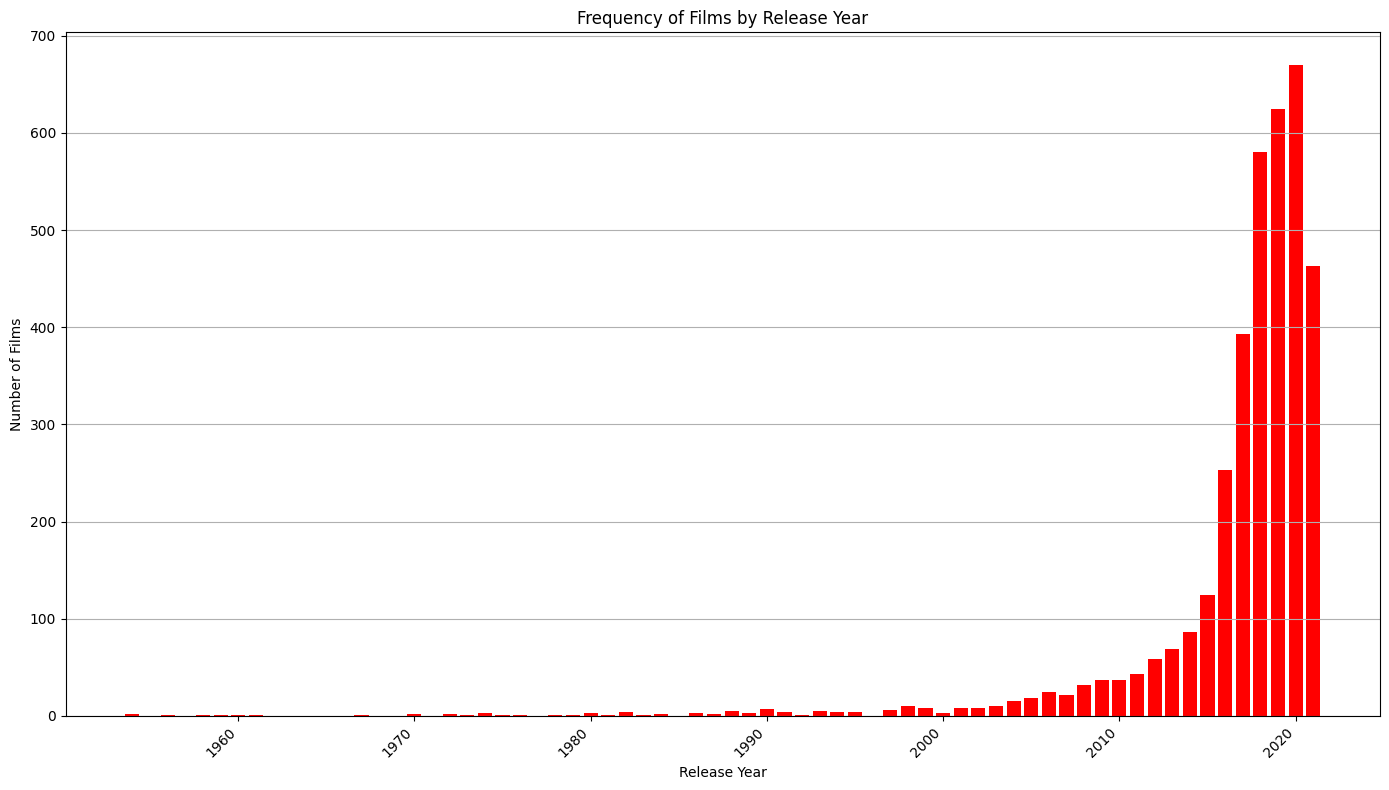

In [79]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'release_year' is in the correct format (int or str)
result['release_year'] = pd.to_numeric(result['release_year'], errors='coerce').astype('Int64')

# Drop rows where 'release_year' is missing
result = result.dropna(subset=['release_year'])

# Count the number of films for each release year
film_counts_by_year = result['release_year'].value_counts().sort_index()

# Plot the frequency of films by release year
plt.figure(figsize=(14, 8))
plt.bar(film_counts_by_year.index, film_counts_by_year, color='red')

# Customize the plot
plt.title('Frequency of Films by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Films')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()  # Adjust layout to prevent clipping

# Show the plot
plt.show()

# 2.4 IMDb Score & Release Country

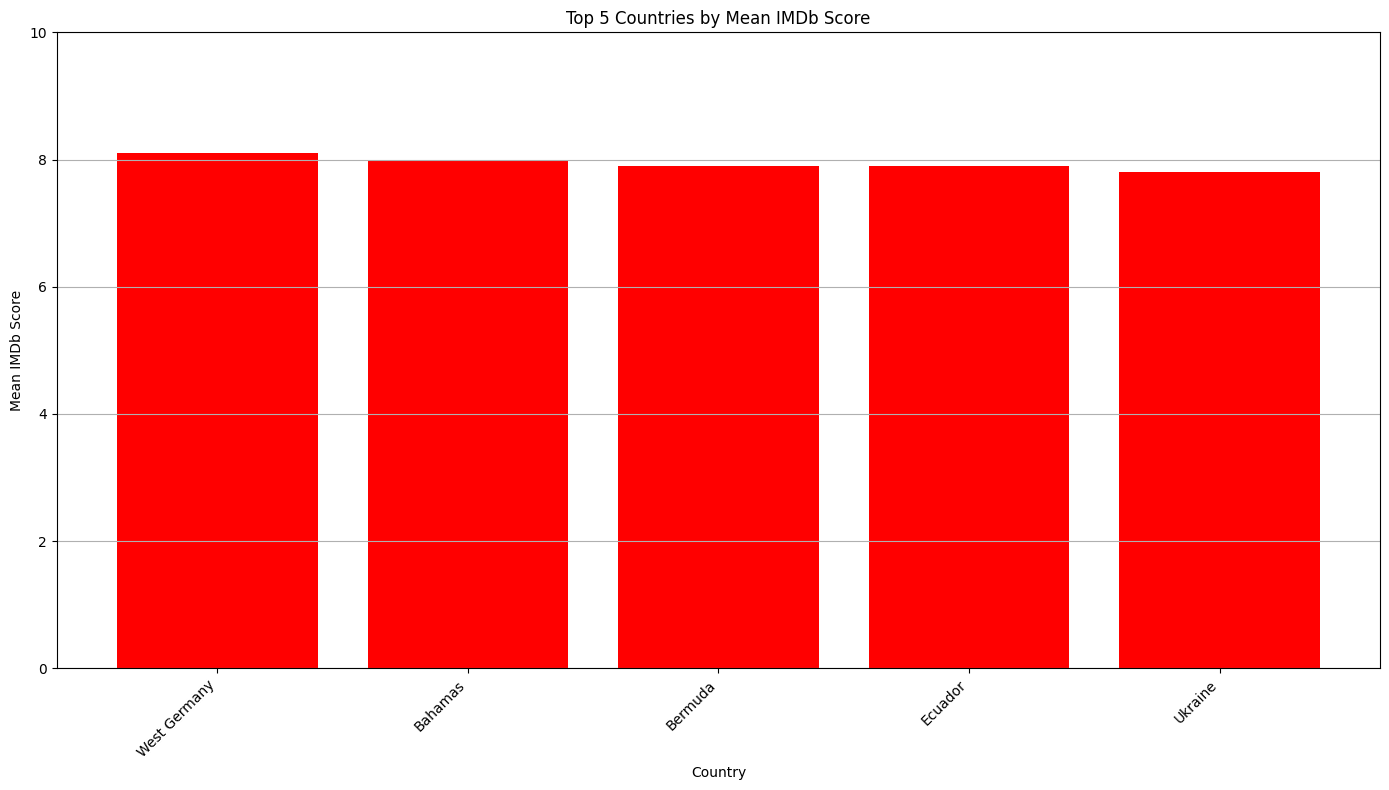

In [86]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data preparation
# Ensure 'imdb_score' is in numeric format
result['imdb_score'] = pd.to_numeric(result['imdb_score'], errors='coerce')

# Drop rows where 'imdb_score' is missing
result = result.dropna(subset=['country', 'imdb_score'])

# Split countries listed together into separate rows
result['country'] = result['country'].apply(lambda x: [country.strip() for country in x.split(',')] if isinstance(x, str) else [])
result = result.explode('country')

# Drop rows where 'country' or 'imdb_score' is missing after splitting
result = result.dropna(subset=['country', 'imdb_score'])

# Group by 'country' and calculate the mean IMDb score for each country
mean_scores_by_country = result.groupby('country')['imdb_score'].mean()

# Sort the results in descending order and select the top 10
top_10_countries = mean_scores_by_country.sort_values(ascending=False).head(5)

# Plot the mean IMDb scores for the top 10 countries
plt.figure(figsize=(14, 8))
plt.bar(top_10_countries.index, top_10_countries, color='red')

# Customize the plot
plt.title('Top 5 Countries by Mean IMDb Score')
plt.xlabel('Country')
plt.ylabel('Mean IMDb Score')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 10)  # IMDb scores range from 0 to 10
plt.grid(axis='y')
plt.tight_layout()  # Adjust layout to prevent clipping

# Show the plot
plt.show()

In [89]:
result['country'] = result['country'].apply(lambda x: [country.strip() for country in x.split(',')] if isinstance(x, str) else [])

# Explode the 'country' column so each country is in its own row
result = result.explode('country')

# Drop rows where 'country' is missing
result = result.dropna(subset=['country'])

# Count the number of Ukrainian films
ukrainian_film_count = result[result['country'].str.contains('Ukraine', case=False, na=False)].shape[0]

print(f'Number of Ukrainian films: {ukrainian_film_count}')

Number of Ukrainian films: 2


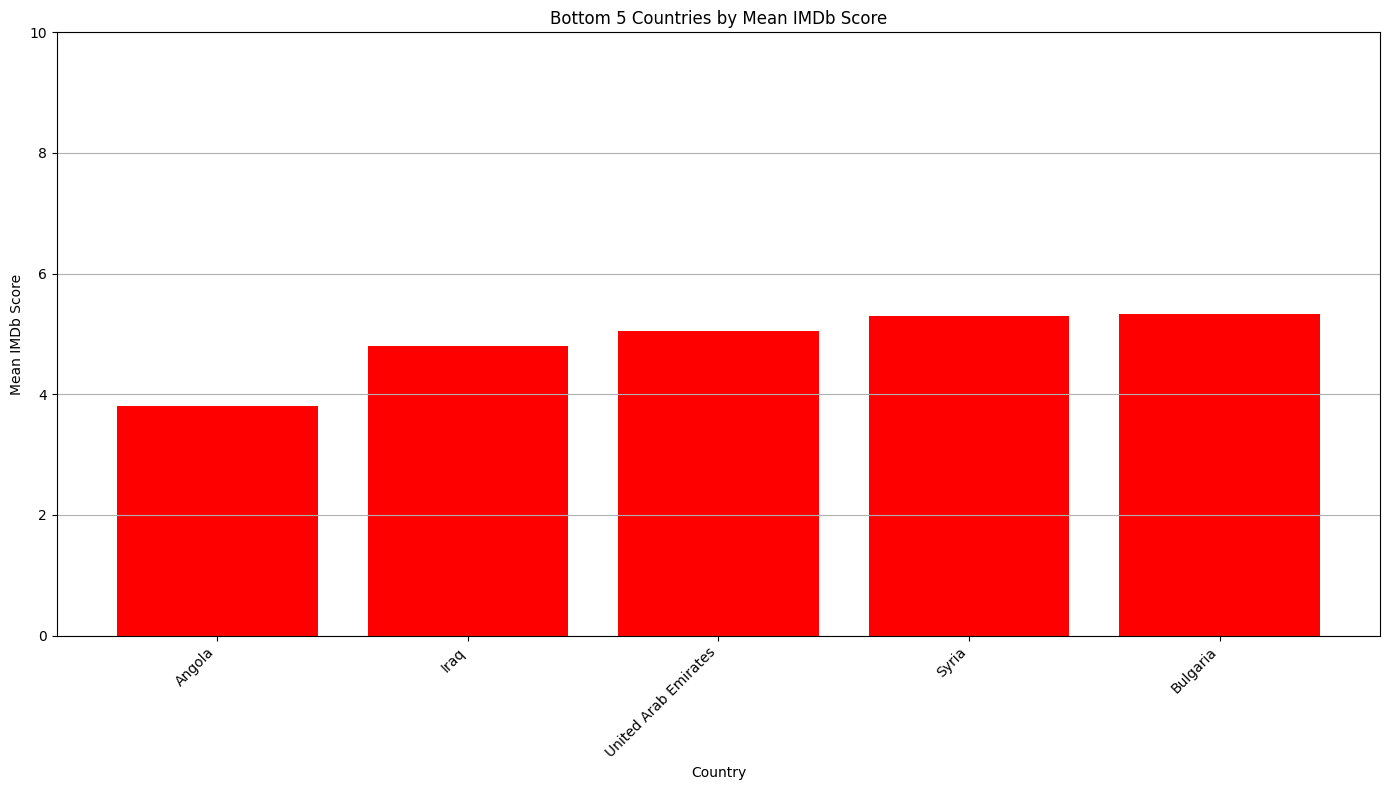

In [88]:
result['imdb_score'] = pd.to_numeric(result['imdb_score'], errors='coerce')

# Drop rows where 'imdb_score' is missing
result = result.dropna(subset=['country', 'imdb_score'])

# Split countries listed together into separate rows
result['country'] = result['country'].apply(lambda x: [country.strip() for country in x.split(',')] if isinstance(x, str) else [])
result = result.explode('country')

# Drop rows where 'country' or 'imdb_score' is missing after splitting
result = result.dropna(subset=['country', 'imdb_score'])

# Group by 'country' and calculate the mean IMDb score for each country
mean_scores_by_country = result.groupby('country')['imdb_score'].mean()

# Sort the results in ascending order and select the bottom 5
bottom_5_countries = mean_scores_by_country.sort_values(ascending=True).head(5)

# Plot the mean IMDb scores for the bottom 5 countries
plt.figure(figsize=(14, 8))
plt.bar(bottom_5_countries.index, bottom_5_countries, color='red')

# Customize the plot
plt.title('Bottom 5 Countries by Mean IMDb Score')
plt.xlabel('Country')
plt.ylabel('Mean IMDb Score')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 10)  # IMDb scores range from 0 to 10
plt.grid(axis='y')
plt.tight_layout()  # Adjust layout to prevent clipping

# Show the plot
plt.show()

# 3 Userbase Analysis

In [25]:
# Loading CSV with userbase data (source = )
userbase = pd.read_csv('Netflix Userbase.csv')

In [9]:
# Convert the 'join' and 'last_payment' columns to datetime objects
userbase['Join Date'] = pd.to_datetime(userbase['Join Date'], format='%d-%m-%y')
userbase['Last Payment Date'] = pd.to_datetime(userbase['Last Payment Date'], format='%d-%m-%y')

# Calculate the subscription length in days
userbase['Subscription Length'] = (userbase['Last Payment Date'] - userbase['Join Date']).dt.days

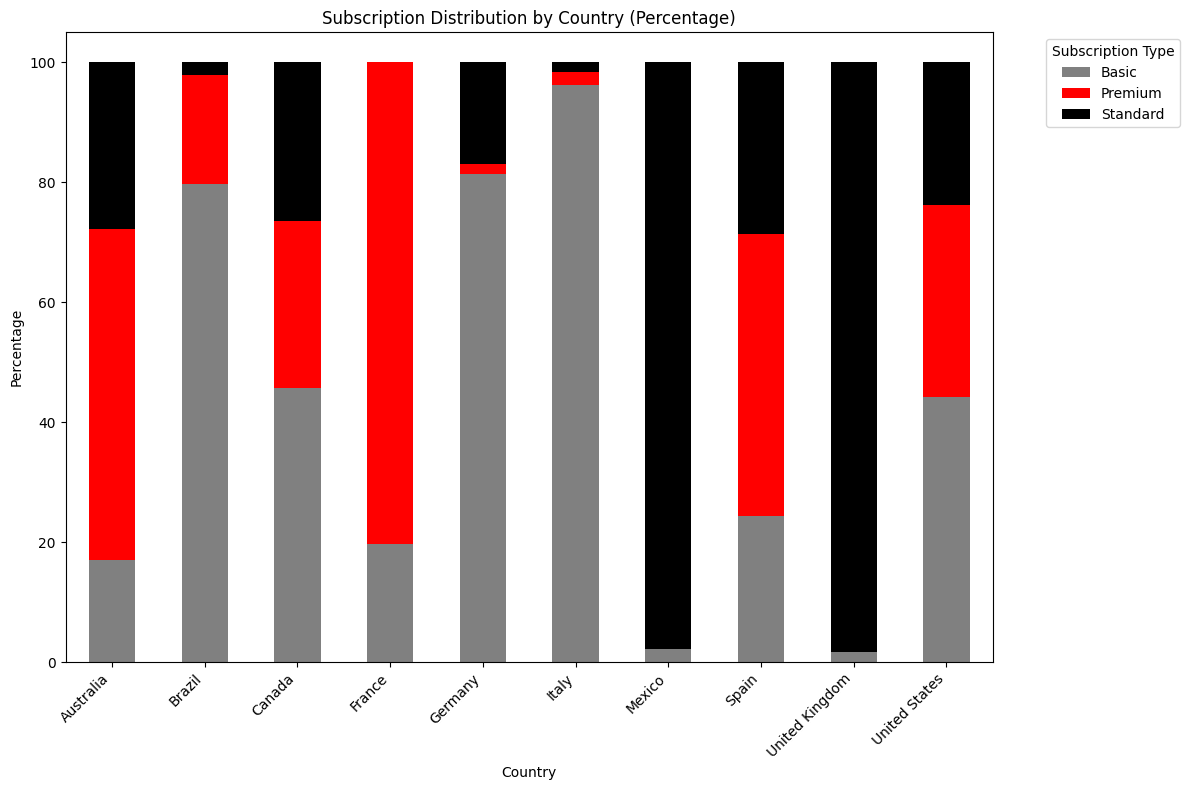

In [18]:
grouped_data = userbase.groupby('Country')['Subscription Type'].value_counts(normalize=True).unstack() * 100

colours = ['grey', 'red', 'black',]

# Plot the data as a stacked bar plot
plt.figure(figsize=(12, 8))
grouped_data.plot(kind='bar', stacked=True, ax=plt.gca(), color = colours)

# Customize the plot
plt.title('Subscription Distribution by Country (Percentage)')
plt.xlabel('Country')
plt.ylabel('Percentage')
plt.legend(title='Subscription Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

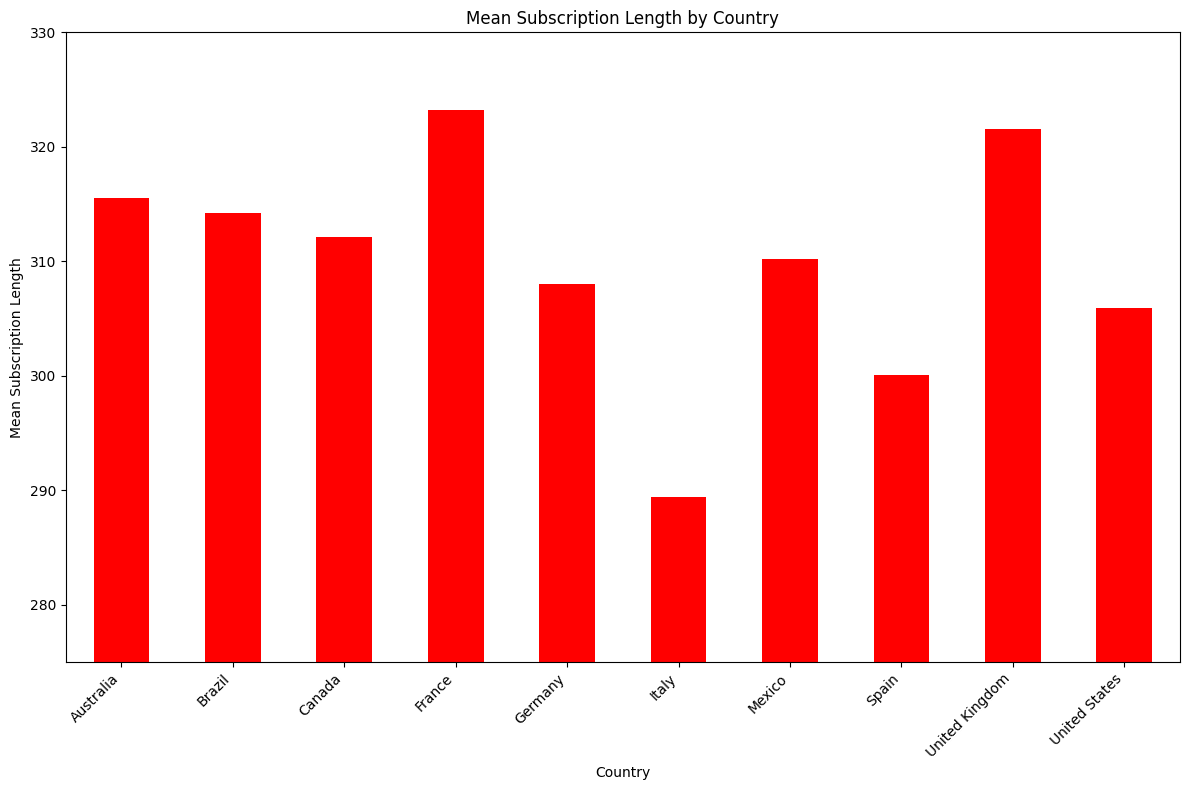

In [24]:
mean_subscription_length = userbase.groupby('Country')['Subscription Length'].mean()

plt.figure(figsize=(12, 8))
mean_subscription_length.plot(kind='bar', color='red')

# Customize the plot
plt.title('Mean Subscription Length by Country')
plt.xlabel('Country')
plt.ylabel('Mean Subscription Length')
plt.xticks(rotation=45, ha='right')
plt.ylim(275, 330)
plt.tight_layout() 

In [96]:
userbase['Country'].nunique()

10